# 7506 - Trabajo práctico 1


##### Librerías

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
import scipy as sc
from sklearn.ensemble import IsolationForest
import sklearn as sk
import geopandas as gpd

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv("./properati_argentina_2021.csv")
df = complete_dataset.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [9]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

## Descripción de las columnas
- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


## Filtrado inicial del Dataset
Como trabajaremos con un universo acotado de propiedades, haremos una selección inicial de las publicaciones que nos interesa analizar:

Como primer paso hay que filtrar las observaciones que su tipo de vivienda sea: Casa, PH o Departamento.

Luego filtramos la ubicacion quedandonos unicamente con las propiedades de Capital Federal.

A continuación, consideraremos solo las que esten cotizadas en dolares.

Y finalmente, tomamos solo las que sean ventas

In [10]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]]

place_l2              place_l3 property_currency property_type  \
25      Capital Federal                   NaN               USD          Casa   
42      Capital Federal                  Boca               USD  Departamento   
43      Capital Federal                  Boca               USD  Departamento   
49      Capital Federal                  Once               USD  Departamento   
51      Capital Federal                 Boedo               USD            PH   
...                 ...                   ...               ...           ...   
460072  Capital Federal      Villa del Parque               USD  Departamento   
460073  Capital Federal      Villa del Parque               USD  Departamento   
460074  Capital Federal      Villa del Parque               USD  Departamento   
460075  Capital Federal      Villa del Parque               USD  Departamento   
460090  Capital Federal  Centro / Microcentro               USD  Departamento   

       operation  
25         Venta  
42         Venta  
43         Venta  
49         Venta  
51         Venta  
...          ...  
460072     Venta  
460073     Venta  
460074     Venta  
460075     Venta  
460090     Venta  

[94249 rows x 5 columns]

A partir de aquí trabajaremos con el dataset filtrado (`ds_filtrado`)

Analizando los tipos de dato de los campos:
- Hay 3 campos de fecha, evaluaremos más adelante como tratarlos.
- Tenemos latitud y longitd en su formato correcto
- Hay una variable place_l6 que no debería ser un número, también analizaremos a que se debe.
- La cantidad de habitaciones (rooms y bedrooms) quizás debería tener valores enteros.
- El precio tiene un tipo correcto

## Exploración Inicial

### Tipos de variable

In [11]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

In [12]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

### Fechas


In [13]:
ds_train[["start_date", "end_date", "created_on"]].isna().sum()

start_date    0
end_date      0
created_on    0
dtype: int64

In [14]:
ds_train["start_date"].value_counts()

2021-12-16    3704
2021-02-13    1691
2021-11-03     825
2021-08-03     665
2021-04-30     645
              ... 
2021-12-26      14
2021-01-02      12
2021-10-24       9
2021-12-19       9
2021-11-27       1
Name: start_date, Length: 365, dtype: int64

In [15]:
ds_train["end_date"].value_counts()

2021-06-05    10244
2022-01-27     7483
2022-02-09     6088
9999-12-31     4020
2021-03-01     1466
              ...  
2022-08-22        1
2022-06-13        1
2022-07-08        1
2022-09-12        1
2021-01-03        1
Name: end_date, Length: 605, dtype: int64

In [16]:
ds_train[ds_train.created_on != ds_train.start_date].shape

(0, 20)

Podemos ver que la columnas created_on y start_date siempre son iguales, descartaremos una de ellas más adelante.

In [17]:
ds_train["created_on"].value_counts()

2021-12-16    3704
2021-02-13    1691
2021-11-03     825
2021-08-03     665
2021-04-30     645
              ... 
2021-12-26      14
2021-01-02      12
2021-10-24       9
2021-12-19       9
2021-11-27       1
Name: created_on, Length: 365, dtype: int64

Hay un valor extraño en end_date, la fecha 9999-12-31, hay 285 apariciones de esta fecha

In [18]:
ds_train[ds_train.end_date == '9999-12-31']['start_date'].value_counts()

2021-02-09    105
2021-06-24     93
2021-06-30     64
2021-02-23     56
2021-07-21     54
             ... 
2021-04-04      1
2021-09-23      1
2021-05-27      1
2021-04-20      1
2021-10-07      1
Name: start_date, Length: 283, dtype: int64

Considerando que todas las fechas son de 2021, y que el dato que falta es el del fin de la publicación (es decir, la casa esta publicada) y a fines de preservar estos datos, traeremos a consideración la duración promedio de cada publicación, calcularemos ese promedio dejando fuera los 285 casos que presentan la fecha inválida.

Tomaremos para el cálculo las fechas convertidas a datetime.

In [19]:
dias = pd.to_datetime(ds_train[ds_train.end_date != '9999-12-31']['end_date']) - pd.to_datetime(
    ds_train[ds_train.end_date != '9999-12-31']['start_date'])
dias.describe()

count                         71379
mean     74 days 12:24:15.554154583
std      83 days 23:27:12.182139167
min                 0 days 00:00:00
25%                16 days 00:00:00
50%                51 days 00:00:00
75%                99 days 00:00:00
max               618 days 00:00:00
dtype: object

El promedio de la duración de las publicaciones es casi de 75 días, asumiremos que las publicaciones con la fecha invalida duraron lo mismo que el promedio y tomaremos como fecha final la fecha de inicio + 75 días.

In [20]:
ds_train.loc[ds_train.end_date == '9999-12-31', 'end_date'] = pd.to_datetime(
    ds_train[ds_train.end_date == '9999-12-31']['start_date']) + dias.mean()
ds_train.end_date

349343    2021-06-05
85258     2021-08-03
235356    2021-06-05
229126    2021-06-05
332157    2021-11-27
             ...    
251240    2021-10-09
189636    2021-06-05
332564    2022-01-27
34435     2021-05-25
54355     2022-01-27
Name: end_date, Length: 75399, dtype: object

Finalmente, como todos los valores son formatos válidos de fecha, podemos convertir sin problemas.

### Conversion tipo de dato

In [21]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

## Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda

In [22]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74552.000000       66570.000000            71479.000000   
mean              2.820756           2.015728              107.238518   
std               1.426696           1.143522              948.893728   
min               1.000000          -1.000000               10.000000   
quartile 1        2.000000           1.000000               45.000000   
median            3.000000           2.000000               65.000000   
quartile 3        4.000000           3.000000              105.000000   
max              40.000000          70.000000           137000.000000   
mode              3.000000           1.000000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72678.000000  72429.000000  72429.000000   
mean                       86.463414    -34.591719    -58.449502   
std                       975.264558      0.186241      0.290540   
min                         1.000000    -53.788624    -71.471192   
quartile 1                 40.000000    -34.615966    -58.466589   
median                     57.000000    -34.595801    -58.438995   
quartile 3                 88.000000    -34.577440    -58.408915   
max                    217000.000000    -24.219827    -54.133330   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.252733e+05  
std           3.149260e+05  
min           5.000000e+03  
quartile 1    9.500000e+04  
median        1.430000e+05  
quartile 3    2.360000e+05  
max           2.140000e+07  
mode          1.100000e+05

## Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [23]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

La tabla muestra varias cosas:
- Hay 75399 propiedades habiendo filtrado solo las de Capital Federal, Venta y USD
- Hay 64617 departamentos, 7436 PHs y 3346 casas
- Hay 11547 propiedades en Palermo
- El id de la propiedad es único y no representa nada útil para nuestro procesamiento. Parecería pasar algo similar con el título, lo analizaremos en más detalle más adelante

## Análisis gráfico de las distribuciones de las variables

#### Distribución de fechas 

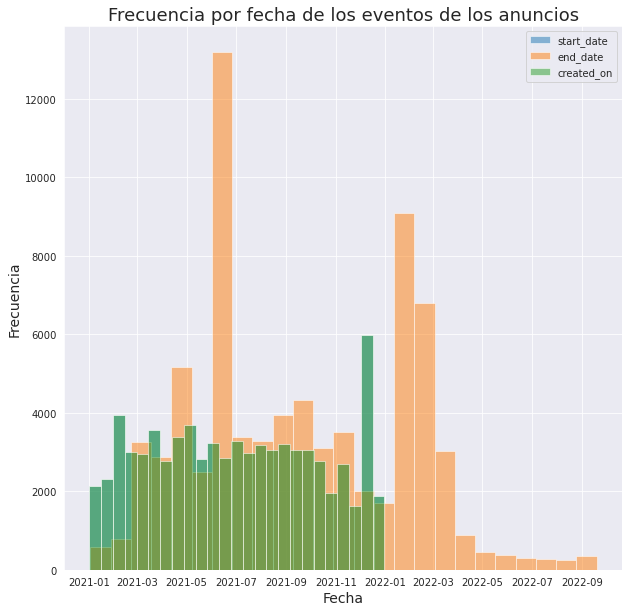

In [24]:

plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')


En este grafico se puede apreciar la distribución de las variables que hacen referencia a las fechas de creacion, alta y baja de los anuncios. Podemos ver que la distribución de las fechas de creación coincide con la distribución de las fechas de alta del anuncio, lo cual tiene sentido que así sea ya que la fecha de creación del anuncio es la primer versión del anuncio en ser dada de alta. 

###  Distribución de barrios
Primero vemos la cantidad de apariciones de los barrios por anuncio en la siguiente tabla:

In [25]:
ds_train['place_l3'].value_counts()

Palermo                 11478
Belgrano                 7127
Caballito                5700
Recoleta                 5013
Villa Urquiza            3726
Almagro                  3256
Nuñez                    2843
Villa Crespo             2541
Flores                   2477
Barrio Norte             2392
Balvanera                2079
Colegiales               1556
Villa Devoto             1535
Villa del Parque         1500
Saavedra                 1481
Puerto Madero            1177
San Telmo                1084
San Cristobal            1048
Boedo                    1024
San Nicolás              1015
Retiro                   1005
Barracas                  996
Floresta                  972
Monserrat                 903
Parque Chacabuco          861
Coghlan                   783
Villa Pueyrredón          782
Mataderos                 585
Villa Luro                582
Chacarita                 542
Liniers                   532
Villa Ortuzar             519
Villa Lugano              510
Parque Pat

Como podemos observar, hay demasiados barrios con pocas apariciones, por lo que nos centraremos en visualizar los primeras 25 barrios que mas aparecen. Agrupando al resto en una nueva categoria llamada "Otras".

In [26]:
top25 = ds_train['place_l3'].value_counts().head(25)

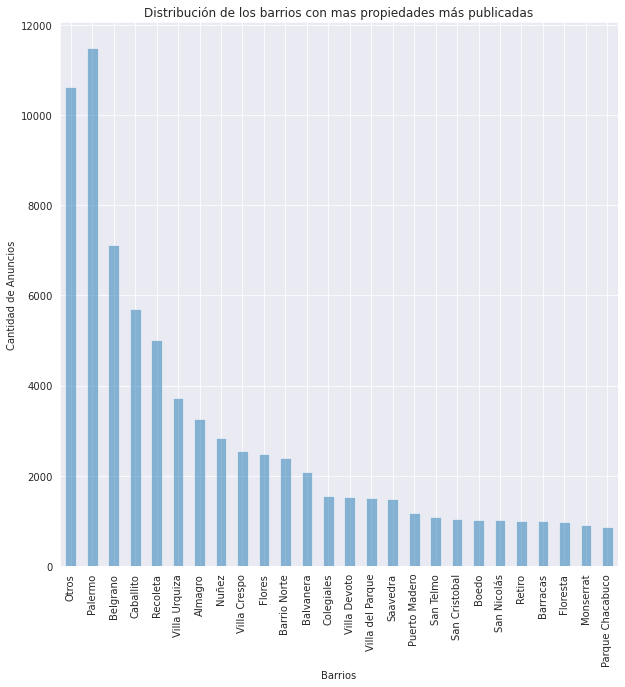

In [27]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

El barrio de Palermo es la que tiene mas propiedades publicadas

### Distribución de tipos de propiedad

Para analizar la distribucion de la variable property_type vamos a agrupar las apariciones en un grafico de barras por tipo de propiedad

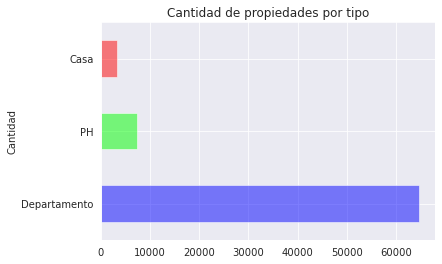

In [28]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

A simple vista se puede ver que la mayoria de publicaciones son de departamentos por una amplia diferencia

### Distribución de latitud y longitud
Para analizar la longitud y latitud vamos a utilizar un grafico de a pares ya que nos aporta más información sobre su distribución, pudiendo visualizar la localización de la propiedad. Adicionalmente se distinguirá por el tipo de propiedad.

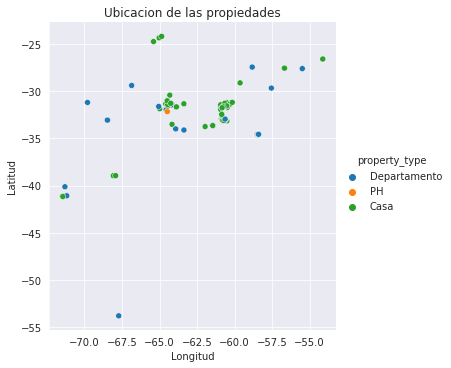

In [29]:
sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

Podemos ver que la mayoria de propiedades publicadas se encuentran concentradas en un área en particular, donde mayormente son de tipo Casa. Y al alejarse se ven departamentos distanciados entre sí.

### Distribución de habitaciones y baños

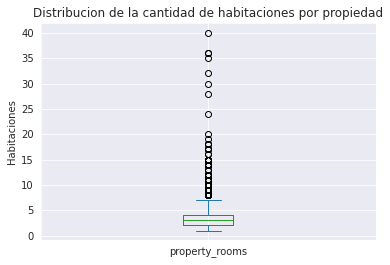

In [30]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

Podemos ver que hay una gran cantidad de outliers, siendo 40 el que mas se aleja, para visualizar mejor la distribucion del boxplot veremos un nuevo grafico sin considerar los outliers.

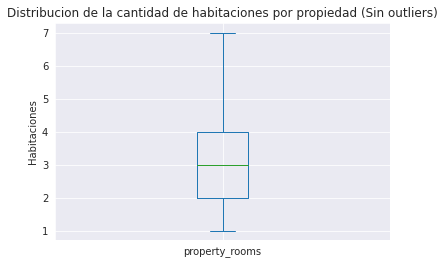

In [31]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

Ahora si podemos visualizar mejor los valores de la mediana, q3, q1 y los bigotes. Que toman la siguiente cantidad de habitaciones:

*   Bigotes: 1 y 7.
*   Cuartil 1: 2
*   Mediana: 3.
*   Cuartil 3: 4.





Hacemos el mismo procedimiento ver la distribución de la cantidad de baños por propiedad

<AxesSubplot:title={'center':'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

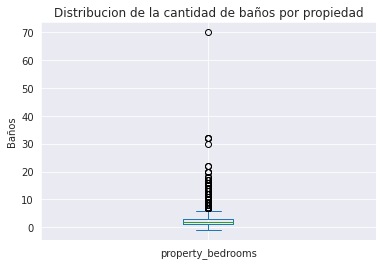

In [32]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")

Vemos que esta vez hay mas distancia entre el outlier mas alejado y el resto de outliers.

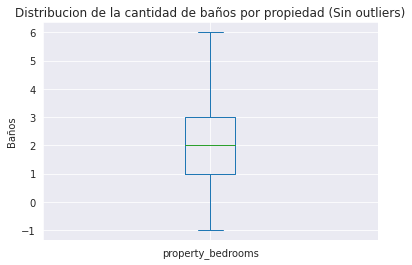

In [33]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

En este caso toman los siguientes valores:

*   Bigotes: -1 y 6.
*   Cuartil 1: 1.
*   Mediana: 2.
*   Cuartil 3: 3.


### Distribución de precio

Para analizar la distribución del precio, como es un tipo de variable continua y cada observación puede tomar un valor en un rango muy grande, optamos por hacer una agrupación por rangos de precios, obteniendo una categoria por cada rango.
Vamos a considerar la mediana para establecer los limites entre cada grupo, consideramos que es un buen valor para dividir al conjunto en partes ya que no se ve afectado drasticamente por outliers (como si sucede con la media).

In [34]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 143000.0


<AxesSubplot:title={'center':'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

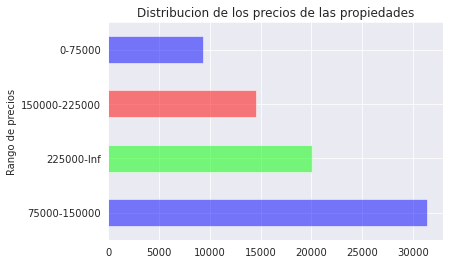

In [35]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

Podemos ver que la mayoria de propiedades estan dentro del rango de 75000 y 150000 USD.

### Distribución de superficie total y cubierta

Utilizaremos un violin plot para cada variable. 

<AxesSubplot:>

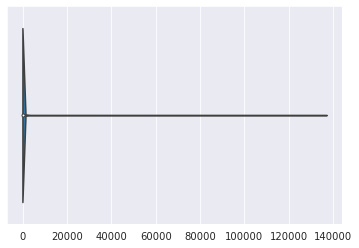

In [36]:
sns.violinplot(ds_train.property_surface_total.values)

A simple vista no esta muy claro el gráfico por la cantidad de outliers que hay, por lo que dejaremos de lado la mayoria de outliers para interpretarlo mas en detalle.

<AxesSubplot:>

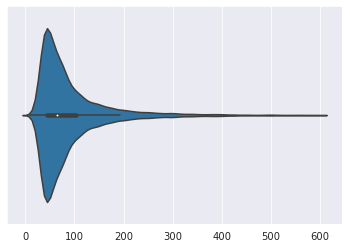

In [37]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

Podemos ver que entre 0 y 100 se encuentra la mayor densidad

Hacemos el mismo procedimiento para visualizar la distribución de la superficie cubierta de la propiedad

<AxesSubplot:>

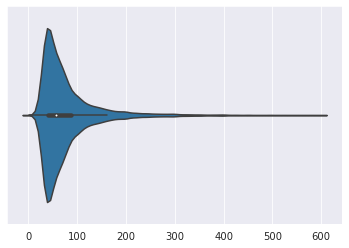

In [38]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

Se nota que el grafico de property_surface_total es similar al de property_surface_covered, teniendo el segundo una densidad levemente menor. 

## Correlación entre variables

A continuación analizaremos la correlación entre las variables cuantitativas, primero visualizando la distribución a pares entre estas.

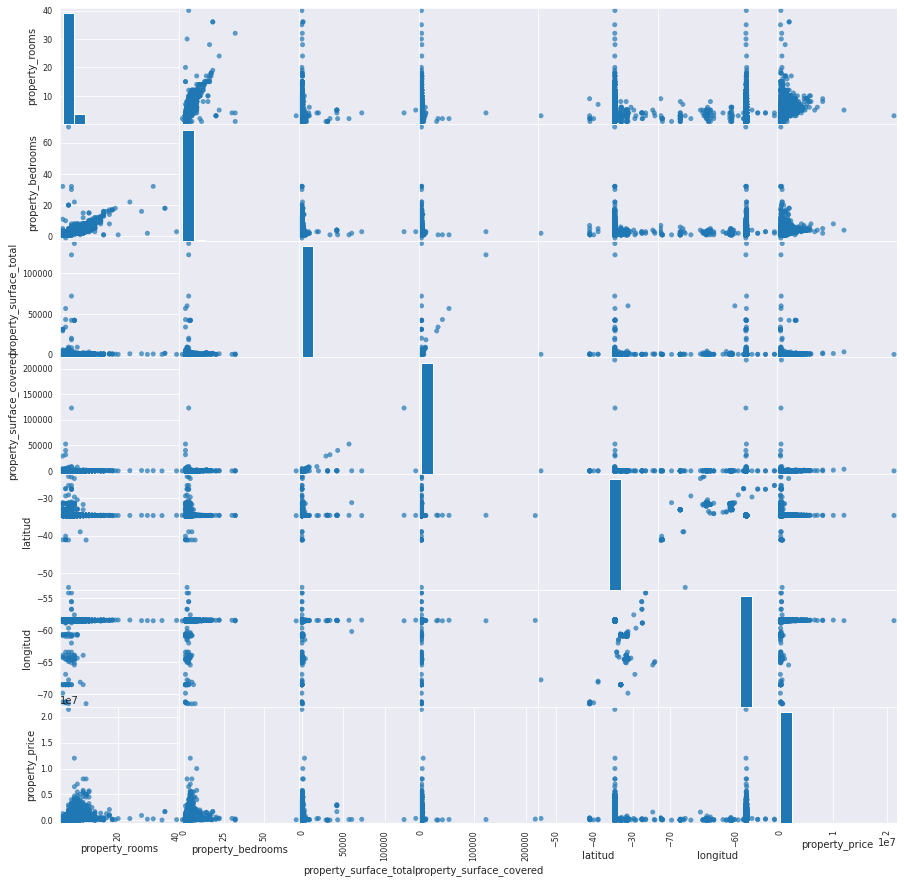

In [39]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

Si bien a simple vista no esta muy claro que variables están correlacionadas entre sí, podemos suponer que puede llegar a haber relación entre property_rooms y property_bedrooms, property_surface_total y property_surface_covered, property_price y property_rooms, property_price y property_bedrooms. Las cuales tiene sentido que pudiesen tener algún tipo de relación.

Además podemos considerar en menor medida que haya una relación entre longitud y latitud (cosa que no necesariamente tendría que ser así)




Analizaremos la correlación lineal entre variables por medio de la medición del coeficiente de Pearson

In [40]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.864769   
property_bedrooms               0.864769           1.000000   
property_surface_total          0.070856           0.069030   
property_surface_covered        0.090737           0.083596   
latitud                         0.005594           0.003208   
longitud                       -0.008200          -0.009135   
property_price                  0.486811           0.424454   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.070856                  0.090737   
property_bedrooms                       0.069030                  0.083596   
property_surface_total                  1.000000                  0.601127   
property_surface_covered                0.601127                  1.000000   
latitud                                 0.027157                  0.002114   
longitud                               -0.015778                 -0.001421   
property_price                          0.084960                  0.053558   

                           latitud  longitud  property_price  
property_rooms            0.005594 -0.008200        0.486811  
property_bedrooms         0.003208 -0.009135        0.424454  
property_surface_total    0.027157 -0.015778        0.084960  
property_surface_covered  0.002114 -0.001421        0.053558  
latitud                   1.000000 -0.151910        0.016858  
longitud                 -0.151910  1.000000        0.022332  
property_price            0.016858  0.022332        1.000000

Haremos un heatmap que nos permite visualizar mejor la correlación

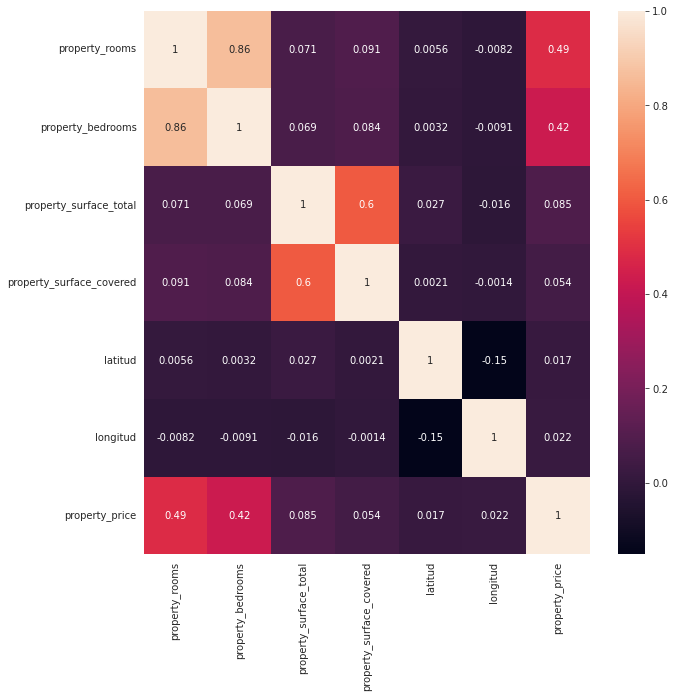

In [41]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

Luego de calcular el coeficiente de Pearson donde los que resultan cercanos a 1 indican una gran correlación entre sí, los que tienden a 0 tienen poca correlación y los cercanos a -1 presentan una notable correlación negativa.

Veremos si las variables que parecían relacionarse anteriormente realmente lo hacen:


In [42]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.86
Entre property_price y property_bedrooms:0.42
Entre property_price y property_rooms:0.49
Entre property_surface_total y property_surface_covered:0.6
Entre longitud y latitud:-0.15


Podemos sacar las siguientes conclusiones sobre las variables que parecian relacionarse:


*   Hay mucha relación entre la cantidad de habitaciones y ambientes.
*   Hay tambien bastante relación entre la superficie total y superficie cubierta de la propiedad.
*   Casi no hay relación entre el precio y la cantidad de habitaciones.
*   Casi no hay relación entre el precio y la cantidad de ambientes.
*   No hay relación entre la latitud y la longitud.





## Análisis de valores faltantes

Ahora analizaremos los datos faltantes del dataset.

### Porcentaje de valores faltantes por columna



id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.939044
longitud                      3.939044
place_l2                      0.000000
place_l3                      0.444303
place_l4                     96.124617
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.123357
property_bedrooms            11.709704
property_surface_total        5.199008
property_surface_covered      3.608801
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


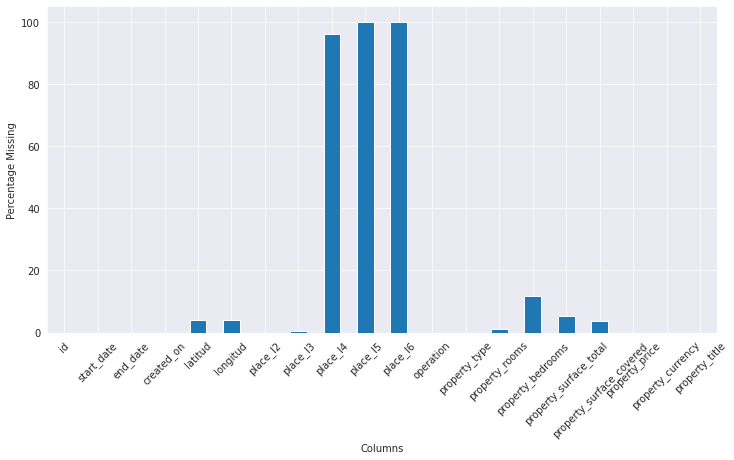

In [43]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

A simple vista podemos ver que las columnas place_l4,place_l5 y place_l6 practicamente no tienen datos, procederemos a eliminarlas.

### Porcentaje de datos faltantes por fila

<AxesSubplot:>

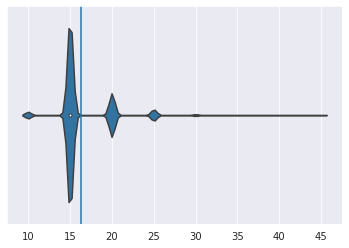

In [44]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

Analizaremos nuevamente el porcentaje por fila luego de trabajar con las columnas

### Procesado de columnas

Descartaremos la columna id debido a que no es relevante para nuestro análisis. No podemos usar un dato uníco porque no representa ninguna característica relevante.

In [45]:
ds_train['id'].head()

349343    7lLQ98X5oaLxEgvqvmRsvQ==
85258     5qGj3aJea4zq0LZZfxmy1w==
235356    uUAhHTxU/NZrxmafq9ebiQ==
229126    oPATJOhauH8x0Z/U0xpTpg==
332157    KdpOXOZ0fMoESK75wftsRw==
Name: id, dtype: object

Como mencionamos anteriormente, evaluaremos descartar place_l4 por la cantidad de valores faltantes que hay.

In [46]:
ds_train['place_l4'].value_counts()

Palermo Hollywood    1245
Palermo Chico         897
Palermo Soho          644
Palermo Viejo         136
Name: place_l4, dtype: int64

In [47]:
ds_train['place_l2'].value_counts()

Capital Federal    75399
Name: place_l2, dtype: int64

In [48]:
ds_train['property_currency'].value_counts()

USD    75399
Name: property_currency, dtype: int64

In [49]:
ds_train['operation'].value_counts()

Venta    75399
Name: operation, dtype: int64

Como place_l4 tiene pocas observaciones y todas corresponden al barrio de Palermo, descartaremos esta columna.
Además, como mencionamos más arriba, la columna created_on siempre es igual a la columna start_date, por lo que también la descartaremos.
Por otro lado, como filtramos solo las propiedades de CABA eliminaremos la columna place_l2 ya que tiene un único valor. Por el mismo motivo eliminaremos la columna property_currency y la columna property_operation.

In [50]:
row_missing_data = ds_train.T.isna().sum() * 100 / column_count
row_missing_data.value_counts()

15.0    56829
20.0    12629
25.0     3305
10.0     1930
30.0      541
35.0       88
40.0       76
45.0        1
dtype: int64

In [51]:
dataset_perc = row_missing_data.value_counts() * 100 / ds_train.shape[0]
print(f"La cantidad de faltantes segun porcentaje representan\n{dataset_perc}")

La cantidad de faltantes segun porcentaje representan
15.0    75.371026
20.0    16.749559
25.0     4.383347
10.0     2.559716
30.0     0.717516
35.0     0.116712
40.0     0.100797
45.0     0.001326
dtype: float64


Ahora que elegimos las columnas deseadas, veremos nuevamente los porcentajes por columna para preparar algunas imputaciones

In [52]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.939044
longitud                      3.939044
place_l2                      0.000000
place_l3                      0.444303
place_l4                     96.124617
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.123357
property_bedrooms            11.709704
property_surface_total        5.199008
property_surface_covered      3.608801
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


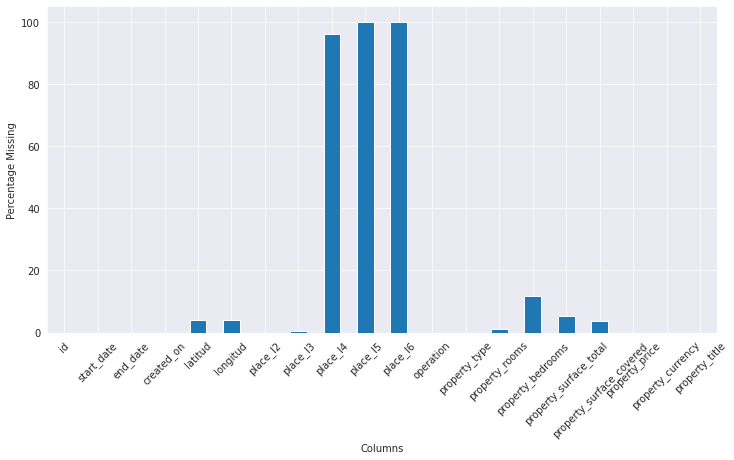

In [53]:
plot_missing_by_column(ds_train)

Eliminaremos las columnas mencionadas anteriormente. Luego, haremos algunas imputaciones sobre los datos faltantes para reparar algunos.


In [54]:
## Train

ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
              inplace=True, axis=1)

## Test
ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
             inplace=True, axis=1)

## Reparacion de datos faltantes

Ahora analizaremos columna a columna como podemos reparar esos datos.

### Pre Imputacion de latitud y longitud

latitud    3.939044
dtype: float64


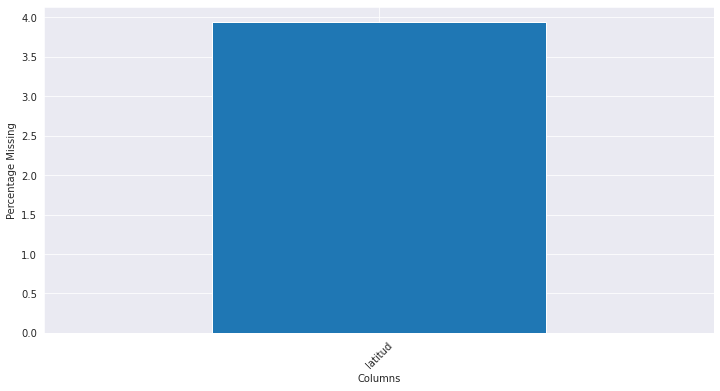

In [55]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.939044
dtype: float64


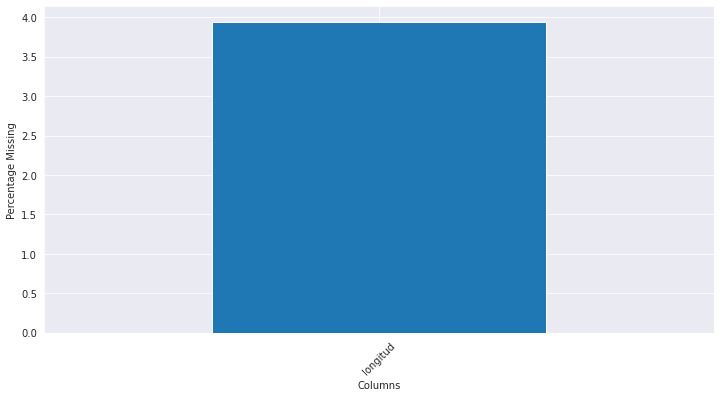

In [56]:
plot_missing_by_column(ds_train[['longitud']])

Vemos que de las coordenadas faltantes, siempre que falta una falta la otra también. No hay casos donde solo falte 1 de las 2 coordenadas.

In [57]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [58]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [59]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.545%
Los datos faltantes en la columna place_l3 para test representan el 4.605%


Para reconstruir los datos faltantes nos vamos a basar en el barrio marcado por 'place_l3' calculando la latitud y longitud media de cada uno y asignarle esos datos.

In [60]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

Vemos que los datos restantes ahora mismo son aquellos que tampoco tienen asignado un barrio. Dichos datos son irreparables, ya que no tenemos ninguna información respecto a la ubicación.

In [61]:
ds_train[ds_train.latitud.isna()]

id start_date   end_date  latitud  longitud  \
336741  9axBqXrySzGV8sAeS4cLtQ== 2021-04-13 2021-06-05      NaN       NaN   
169680  4uu6b2tzOIdwFnsGO1OIzA== 2021-07-28 2021-08-11      NaN       NaN   
292979  B7n7Xn2Vqf49Ff+AG0T3Jw== 2021-02-23 2022-08-01      NaN       NaN   
459195  E8hNlBjeRdD9Cr759qVghQ== 2021-01-05 2021-03-01      NaN       NaN   
144352  sw+PrkXzwMmO2f/FL9fX9w== 2021-07-29 2021-10-30      NaN       NaN   
...                          ...        ...        ...      ...       ...   
142552  7lG/owYTkpnfFFv4mY2AAg== 2021-06-08 2021-11-04      NaN       NaN   
114489  m840XwQvdPOmo1l4HKF73Q== 2021-12-07 2022-01-27      NaN       NaN   
120615  W15IVdCCvZ80j38hC7Y4Dw== 2021-05-13 2021-06-05      NaN       NaN   
151051  NWbXB0gPxuUNRgXVhs8sKw== 2021-08-05 2021-11-04      NaN       NaN   
161811  OBEJUlZ0HWzDeQOdVfUQ5g== 2021-10-07 2022-02-17      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
336741      NaN  Departamento             3.0                2.0   
169680      NaN  Departamento             2.0                NaN   
292979      NaN  Departamento             2.0                1.0   
459195      NaN  Departamento             2.0                1.0   
144352      NaN  Departamento             3.0                2.0   
...         ...           ...             ...                ...   
142552      NaN            PH             3.0                NaN   
114489      NaN  Departamento             5.0                3.0   
120615      NaN  Departamento             3.0                2.0   
151051      NaN          Casa             4.0                NaN   
161811      NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
336741                    87.0                      87.0        119000.0   
169680                     NaN                      44.0         63000.0   
292979                    45.0                      45.0         73500.0   
459195                    44.0                      44.0        128000.0   
144352                    87.0                      87.0        117000.0   
...                        ...                       ...             ...   
142552                    40.0                      55.0        170000.0   
114489                    80.0                      80.0        192000.0   
120615                    98.0                      98.0        240000.0   
151051                    90.0                     140.0        290000.0   
161811                    39.0                      39.0         55000.0   

                                           property_title  
336741  3 Ambientes amplios, 88 m2, con 2 baños, prox ...  
169680  Departamento en Venta Caba / Buenos Aires (B13...  
292979  2 AMBIENTES EN DUPLEX - COCHERA INCLUIDA | SAR...  
459195  San Martin Ctro. s/ San Lorenzo Impecable Dpto...  
144352  3 Ambientes amplios, 88 m2, con 2 baños, prox ...  
...                                                   ...  
142552        PH en Venta Caba / Buenos Aires (D038 1551)  
114489                  DEPARTAMENTO 5 AMBIENTES - CENTRO  
120615                     Departamento - Capital Federal  
151051     Casa  en Venta Caba / Buenos Aires (D038 1562)  
161811  25 DE MAYO AL 700 - APTO PROF LUMIN OPCION COC...  

[135 rows x 13 columns]

In [62]:
ds_test[ds_test.latitud.isna()]

id start_date end_date  latitud  longitud  \
84681   FDP0I8rP+WzTtwUj4Gc2iQ==        NaT      NaT      NaN       NaN   
385332  ih9LGBbNdcMTUZDASVl5iw==        NaT      NaT      NaN       NaN   
154305  fHbS9F2VO0veJsrs92H+aA==        NaT      NaT      NaN       NaN   
458683  UbrWCa8FnhGIRWAEi5TWkQ==        NaT      NaT      NaN       NaN   
458696  UxrImoZVU0nEah53uM/NSg==        NaT      NaT      NaN       NaN   
130464  ZRuBHv9VeFO7JSugv+Bbrg==        NaT      NaT      NaN       NaN   
47980   SN9IPUb1lO6rVU9Q6jHRXA==        NaT      NaT      NaN       NaN   
270973  91Kb4G/QKBS5FMM4dwZjTQ==        NaT      NaT      NaN       NaN   
3099    cLeo0+I+Zt0/4dwt9KeFlg==        NaT      NaT      NaN       NaN   
381103  O4yEtUmMXzMQRltyV5QZ9w==        NaT      NaT      NaN       NaN   
448210  DvLI8uRl2AL9kVavsIxkJQ==        NaT      NaT      NaN       NaN   
218048  vRA/0y8xkAUweY9h1T7EzA==        NaT      NaT      NaN       NaN   
421130  ShOanYvqbyXRLC3X6twa/g==        NaT      NaT      NaN       NaN   
181520  GM7E6ngDRinluTkRR97Hqw==        NaT      NaT      NaN       NaN   
379289  3L7hKIhb/QHLqfMAXRNisQ==        NaT      NaT      NaN       NaN   
335758  WHW43q4WY6/9r8onU+XHlA==        NaT      NaT      NaN       NaN   
93803   MbzcuMKtbLgu0MSLdMv8gw==        NaT      NaT      NaN       NaN   
180567  VeUeVZzvn6CG1admtOWObg==        NaT      NaT      NaN       NaN   
25588   7usJZ7GPEzhPIFyuSPrb8Q==        NaT      NaT      NaN       NaN   
146411  MbCY2JnbC/KUc446DZLA6w==        NaT      NaT      NaN       NaN   
125426  w1cINOUEBKAj/8RpOso+4A==        NaT      NaT      NaN       NaN   
364007  49YfRYIx481tyM+DHtFlRQ==        NaT      NaT      NaN       NaN   
248747  Lrs8VtszCjsi0+FEhk7xOQ==        NaT      NaT      NaN       NaN   
221835  cQOhFHR/RFEu7RjROsN4Rw==        NaT      NaT      NaN       NaN   
313804  +pYkycxlnUpcKI6YfV68KQ==        NaT      NaT      NaN       NaN   
341285  fH/+4asrLhpVCY1KxLwFKQ==        NaT      NaT      NaN       NaN   
318752  kSB4D67fcBa7uQqz5FRKZw==        NaT      NaT      NaN       NaN   
44423   oGPgLc4InEc+5rOhp+H7PA==        NaT      NaT      NaN       NaN   
32679   l6NUlcdSPVsmmKdQIMzWrw==        NaT      NaT      NaN       NaN   
158449  /j3wYMmm9WUqKnvnVvlZlQ==        NaT      NaT      NaN       NaN   
448188  O+BxvGy0FaQeVbN9TO9xhg==        NaT      NaT      NaN       NaN   
445813  q2+AOsVPVqqxps7V5dCJZQ==        NaT      NaT      NaN       NaN   
336734  AhGnqYUCnKE+F8ggXKB29Q==        NaT      NaT      NaN       NaN   
223275  pcuhUjbSIqjPTsytR6Kqew==        NaT      NaT      NaN       NaN   
143123  m281LUJMceK6Z3pN9+h3cg==        NaT      NaT      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
84681       NaN  Departamento             3.0                2.0   
385332      NaN  Departamento             2.0                NaN   
154305      NaN  Departamento             1.0                NaN   
458683      NaN          Casa             NaN                4.0   
458696      NaN          Casa             NaN                2.0   
130464      NaN          Casa             NaN                6.0   
47980       NaN  Departamento             2.0                1.0   
270973      NaN          Casa             5.0                3.0   
3099        NaN          Casa             3.0                2.0   
381103      NaN  Departamento             3.0                NaN   
448210      NaN          Casa             6.0                5.0   
218048      NaN          Casa             NaN                2.0   
421130      NaN          Casa             NaN                5.0   
181520      NaN  Departamento             2.0                1.0   
379289      NaN  Departamento             3.0                NaN   
335758      NaN  Departamento             2.0                1.0   
93803       NaN  Departamento             1.0                NaN   
180567      NaN  Departamento             4.0                3.0   
25588       NaN  Departamento        

In [63]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0018%
El porcentaje de valores a eliminar en test corresponden a un 0.0019%


In [64]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

### Post Imputacion de latitud y longitud

latitud    0.0
dtype: float64


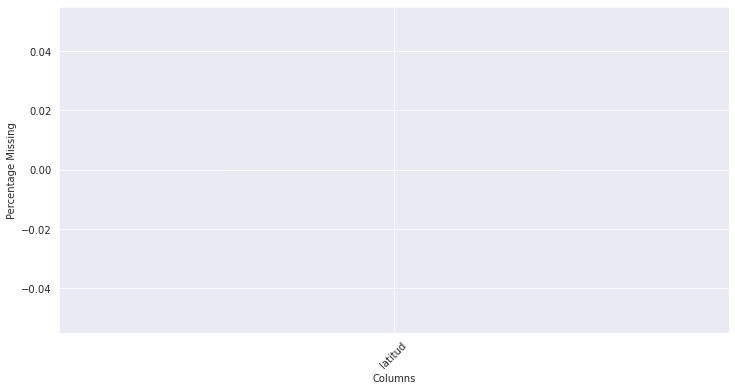

In [65]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


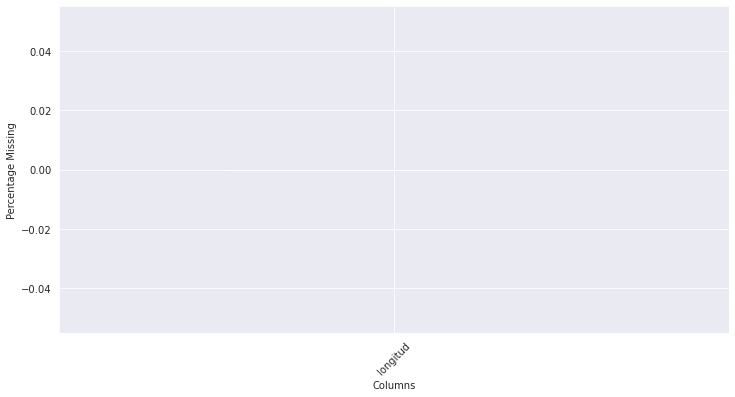

In [66]:
plot_missing_by_column(ds_train[['longitud']])

### Pre imputación de ambientes

property_rooms    1.096142
dtype: float64


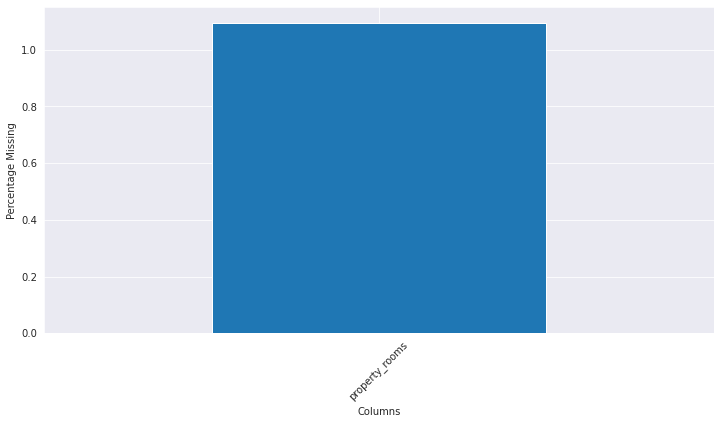

In [67]:
plot_missing_by_column(ds_train[['property_rooms']])

#### Reparacion de ambientes faltantes en base al titulo de la propiedad

In [68]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")


In [69]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 825
cantidad de ambientes faltantes post reparacion: 661
cantidad inicial de ambientes a reparar: 189
cantidad de ambientes faltantes post reparacion: 181


### Post Imputacion de ambientes

property_rooms    0.878242
dtype: float64


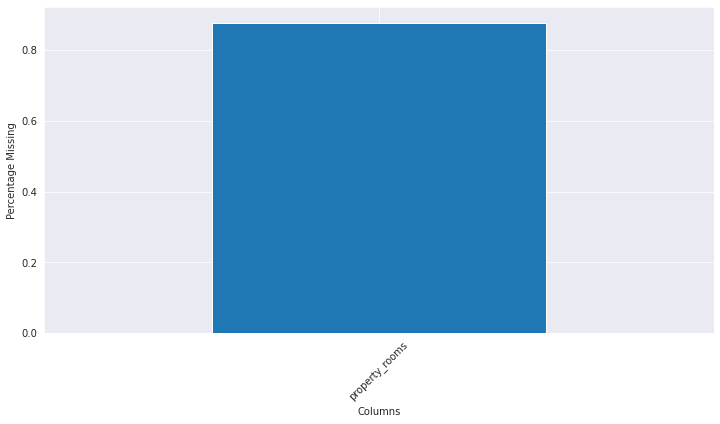

In [70]:
plot_missing_by_column(ds_train[['property_rooms']])

Como las que quedan sin datos son pocas observaciones, las eliminaremos

In [71]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


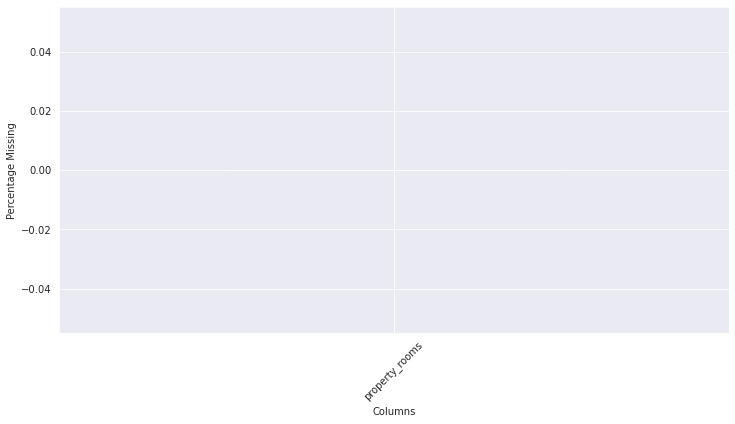

In [72]:
plot_missing_by_column(ds_train[['property_rooms']])

### Pre Imputacion de Habitaciones

property_bedrooms    11.34941
dtype: float64


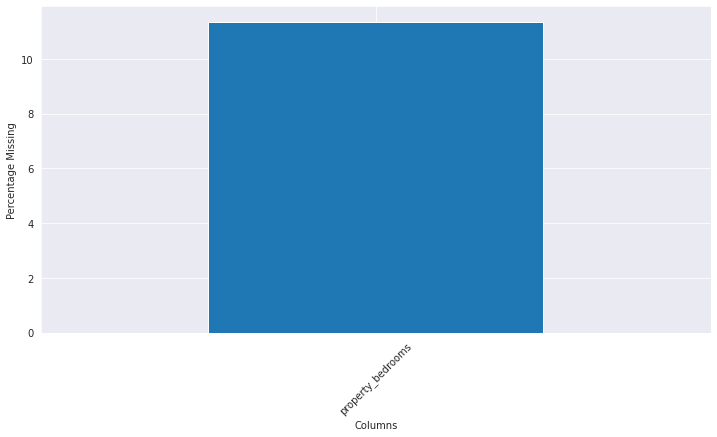

In [73]:
plot_missing_by_column(ds_train[['property_bedrooms']])

#### Reparacion de habitaciones faltantes en base a los ambientes

In [74]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas



El total de habitaciones en train es: 74603
El total de habitaciones invalidas es: 134. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18634
El total de habitaciones invalidas es: 28. Constituye al 0% de los datos del ds


id start_date end_date    latitud   longitud  \
113814  BrWCt7KwuYGEW5/x5LsTkg==        NaT      NaT -34.577669 -58.428640   
100807  3u2SeeteiBPk/c3nU9WQnA==        NaT      NaT -34.565974 -58.433832   
41088   ngtAPqtsUhn8Y9+r/FgteA==        NaT      NaT -34.614573 -58.480650   
443898  oj7pM0UnMdxUrnbcWlN6DQ==        NaT      NaT -34.562809 -58.476758   
385730  qgnjg2cQkLeAALjoJhJl1g==        NaT      NaT -34.623053 -58.447006   
115479  UpWmRfbiee9zaj0DBbsKRw==        NaT      NaT -34.613261 -58.361513   
115491  u5hOV+bJihRU3VAVxsfsrw==        NaT      NaT -34.613037 -58.360984   
459345  tDk6Qv0vzIsLSAkJbV/O/Q==        NaT      NaT -34.578661 -58.428397   
337147  UVuiurLBb+DzTf73JSOI4g==        NaT      NaT -34.607469 -58.421879   
115482  +/GRR4rodHJolrb0SSNIqQ==        NaT      NaT -34.613261 -58.361513   
432011  s14IJlvWuE+oZmMurxiGpw==        NaT      NaT -34.643086 -58.435170   
258718  k8B5YFFJR/qAum7Vo/NTlg==        NaT      NaT -34.603809 -58.461512   
115167  Z9zRCLIVKH/KIgKLvMsstw==        NaT      NaT -34.620586 -58.439740   
400127  gg6+Wj9KRWOi92ri7KuuXw==        NaT      NaT -34.637611 -58.402928   
150228  Lk0e2KiZLt5LPGGQfbj8xQ==        NaT      NaT -34.605254 -58.468938   
126403  ETzg09MPRQDliI9p8PzeBg==        NaT      NaT -34.564988 -58.444710   
117694  4VBstvnpTSc1FQ1/aFyriw==        NaT      NaT -34.562468 -58.453915   
115505  7t2vq6m6pNwJXleT2SaFSg==        NaT      NaT -34.623793 -58.402256   
361800  U1B7lvnYtd4L18Ccb8mvhw==        NaT      NaT -34.580210 -58.412815   
229212  azlGDc44w5UKu1Ft0aWdLA==        NaT      NaT -34.623053 -58.447006   
171569  zKrvUbrB7p50rDDxMp2yrw==        NaT      NaT -34.617993 -58.361880   
214047  iiluCSGPoNS2rL+viZL6Dw==        NaT      NaT -34.595985 -58.401429   
48332   /VjUSHWTdfV9lkqkj+SFvA==        NaT      NaT -34.613200 -58.471100   
115504  qsmPAKJ9brIGa8jbUAtQ1Q==        NaT      NaT -34.613261 -58.361513   
63013   q5mE4qv6OxYNWlMis+Mwig==        NaT      NaT -34.650211 -58.503437   
214585  C6Qi5kPtL8N7sKt0h7Qu7g==        NaT      NaT -34.601229 -58.435750   
399491  QNzj6fRvnJSZy8HVQQAfiw==        NaT      NaT -34.618449 -58.505422   
115166  +m3+nsAwQ9Us0fjB6pJ8Mg==        NaT      NaT -34.620586 -58.439740   

                   place_l3 property_type  property_rooms  property_bedrooms  \
113814             Belgrano  Departamento             1.0                2.0   
100807              Palermo  Departamento             3.0                4.0   
41088      Villa del Parque  Departamento             2.0               11.0   
443898             Congreso  Departamento             1.0                2.0   
385730            Caballito  Departamento             4.0                5.0   
115479        Puerto Madero  Departamento             3.0                4.0   
115491        Puerto Madero  Departamento             3.0                4.0   
459345              Palermo  Departamento             2.0                3.0   
337147              Almagro  Departamento             3.0               20.0   
115482        Puerto Madero  Departamento             3.0                4.0   
432011     Parque Chacabuco            PH             3.0                4.0   
258718     Villa Pueyrredón            PH             3.0                6.0   
115167            Caballito            PH             2.0                3.0   
400127     Parque Patricios  Departamento             1.0                2.0   
150228     Villa del Parque          Casa             3.0                5.0   
126403             Belgrano  Departamento             5.0                7.0   
117694             Belgrano  Departamento             1.0                2.0   
115505        San Cristobal  Departamento             1.0                2.0   
361800              Palermo  Departamento             1.0                2.0   
229212            Caballito  Departamento             4.0                5.0   
171569        Puerto Madero  Departamento             4.0                6.0   
214047 

Si tomamos en cuenta que 128 (train) y 35 (test) de los valores (0% aproximado) tienen mas habitaciones que ambientes, podriamos pensar en imputar los datos faltantes elimanando estas filas y haciendo que los valores que sean NAN, ahora sean habitaciones = ambientes - 1

In [75]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55726. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13963. Constituyen al 74% de los datos


Las habitaciones que son Ambientes - 1 son: 55797. Constituyen al 74% de los datos. Como notamos que es un valor muy representativo del dataset, optamos por imputar los datos faltantes como mencionamos antes, es decir, los ambientes que no esten vacios y que tengan habitaciones vacias, ahora tendran habitaciones = ambientes -1.

In [76]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8467
Valor inicial de habitaciones faltantes en el ds de test: 2056


In [77]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [78]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

### Post Imputacion de habitaciones

property_bedrooms    0.0
dtype: float64


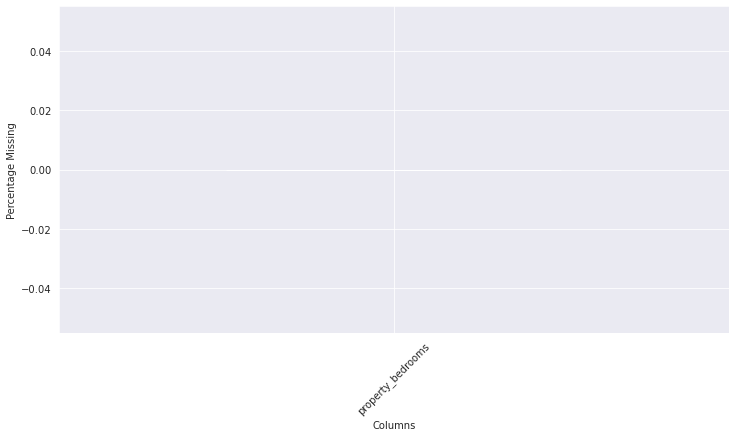

In [79]:
plot_missing_by_column(ds_train[['property_bedrooms']])

### Pre Imputación de Superficie total

property_surface_total    4.983714
dtype: float64


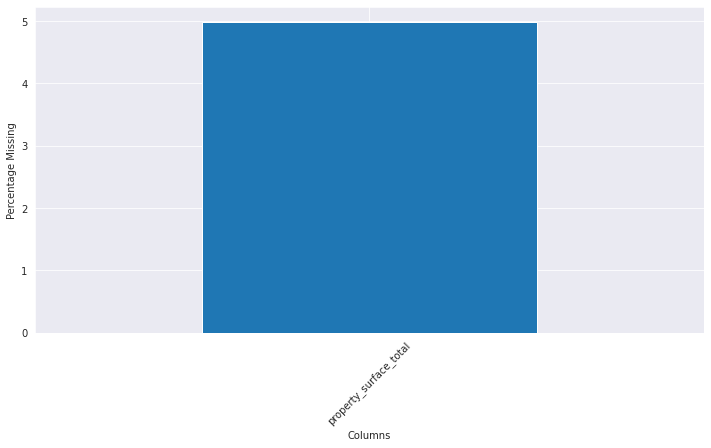

In [80]:
plot_missing_by_column(ds_train[['property_surface_total']])

Como a simple vista muchos registros tienen superficie cubierta, veremos en cuantos faltan ambos datos

In [81]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

#### Reparación de datos faltantes en superficie cubierta

Como todos los datos tienen la superficie cubierta, repararemos estos datos tomando ese valor como superficie total

In [82]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

### Post Imputación de Superficie total

property_surface_total    0.0
dtype: float64


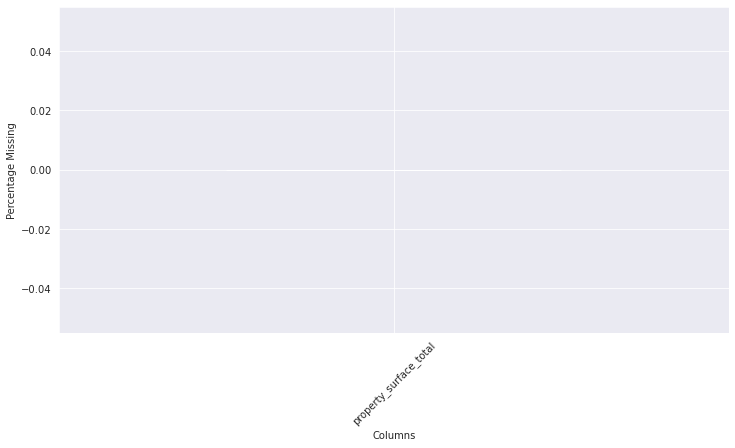

In [83]:
plot_missing_by_column(ds_train[['property_surface_total']])

### Pre Imputación de superficie cubierta

In [84]:
ds_train[ds_train.property_surface_covered.isna()]

id start_date   end_date    latitud   longitud  \
390336  mMQ8HK1v4uP8CgLaDNq96g== 2021-05-05 2021-06-05 -34.595692 -58.443551   
133724  VSwdJqNrqvdyFVH/+RktFg== 2021-02-18 2021-04-07 -34.576178 -58.453102   
339549  q2AuMfRt61rEm+g5/tskkA== 2021-06-01 2021-06-05 -34.582588 -58.417292   
17241   BoUxlli/K+/G4INxU8ST9g== 2021-06-10 2022-01-15 -34.622109 -58.407164   
114899  +rU0jhw81bl6vQCpzePziA== 2021-12-07 2022-01-27 -34.564895 -58.460904   
...                          ...        ...        ...        ...        ...   
262772  GthcJMIWXsj7gJIdp5qo8g== 2021-11-20 2021-11-26 -34.592622 -58.403043   
182205  v5NfrN+68lhwxAlp5mjlFw== 2021-08-06 2022-05-08 -34.627059 -58.445419   
191473  T+ccRRIrBApmap9eNE0/dw== 2021-11-01 2022-01-27 -34.548394 -58.466989   
392647  uuJKmBHT4Zp1k6XIef3z+w== 2021-10-28 2021-11-04 -34.576814 -58.465850   
17892   QsHoM/bm2HdBBEwnWY+RgA== 2021-08-28 2022-01-27 -34.621756 -58.444437   

             place_l3 property_type  property_rooms  property_bedrooms  \
390336   Villa Crespo  Departamento             2.0                1.0   
133724     Colegiales  Departamento             3.0                2.0   
339549        Palermo  Departamento             2.0                1.0   
17241   San Cristobal  Departamento             3.0                2.0   
114899       Belgrano  Departamento             2.0                1.0   
...               ...           ...             ...                ...   
262772   Barrio Norte  Departamento             3.0                2.0   
182205      Caballito  Departamento             3.0                2.0   
191473          Nuñez  Departamento             3.0                2.0   
392647       Belgrano  Departamento             5.0                4.0   
17892       Caballito  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
390336                    40.0                       NaN         90000.0   
133724                   123.0                       NaN        350000.0   
339549                    64.0                       NaN        145000.0   
17241                     69.0                       NaN        210000.0   
114899                    25.0                       NaN         90000.0   
...                        ...                       ...             ...   
262772                    63.0                       NaN        140000.0   
182205                    40.0                       NaN         82000.0   
191473                    79.0                       NaN        220000.0   
392647                   300.0                       NaN        850000.0   
17892                     48.0                       NaN        103000.0   

                                           property_title  
390336  Av. Corrientes 5600,  Villa Crespo - 2 ambient...  
133724  Hermoso PH totalmente reciclado a nuevo hace 2...  
339549                     Excelente 2 amb con gran patio  
17241   Excepcional vista, piso 27! 3 ambientes con ba...  
114899                            Departamento - Belgrano  
...                                                   ...  
262772                        Departamento - Barrio Norte  
182205           Muy luminoso depto de 3 amb. Reciclado!!  
191473                 Espectacular 3 ambientes en Nuñez!  
392647  Piso de categoria hecho a nuevo en pleno Belgr...  
17892                            Departamento - Caballito  

[2644 rows x 13 columns]

property_surface_covered    3.544093
dtype: float64


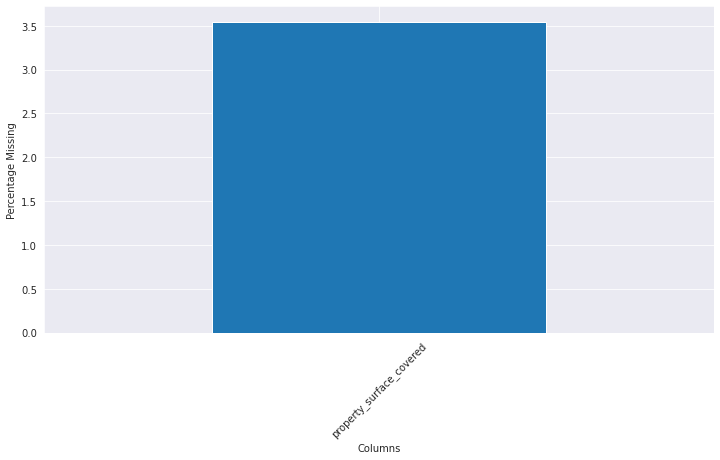

In [85]:
plot_missing_by_column(ds_train[['property_surface_covered']])

##### Reparación de datos faltantes en Superficie cubierta

Como tenemos 2672 registros nulos para la superficie cubierta, imputaremos de la misma forma los registros que son Departamentos porque su superficie total suele ser muy cercana a la cubierta

In [86]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2384
PH               179
Casa              81
Name: property_type, dtype: int64

In [87]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [88]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 260


In [89]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 618


Los 262 registros restantes de train los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

Los 651 registros restantes de test tambien los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

In [90]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

Volvemos a evaluar el porcentaje de datos faltantes

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.208493
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


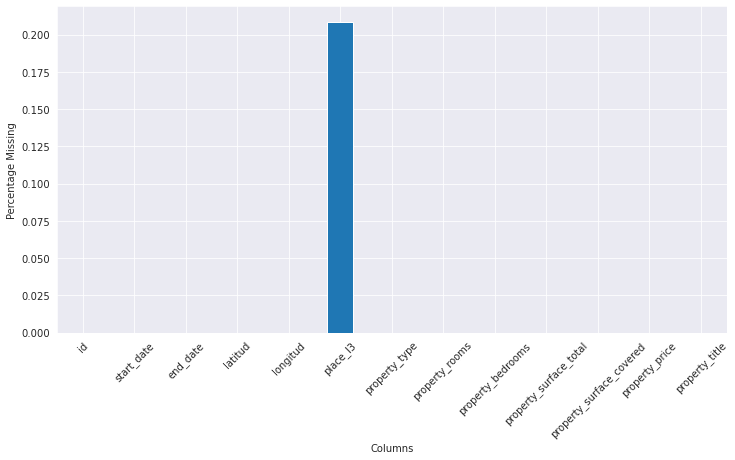

In [91]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

## Grafico de los barrios de CABA

In [92]:
# Proceso el archivo de los barrios de CABA
barrios = gpd.read_file('./barrios.geojson')
barrios.head()

BARRIO  COMUNA    PERIMETRO          AREA  OBJETO  \
0         CHACARITA    15.0  7724.852955  3.115707e+06  BARRIO   
1          PATERNAL    15.0  7087.513295  2.229829e+06  BARRIO   
2      VILLA CRESPO    15.0  8131.857075  3.615978e+06  BARRIO   
3  VILLA DEL PARQUE    11.0  7705.389797  3.399596e+06  BARRIO   
4           ALMAGRO     5.0  8537.901368  4.050752e+06  BARRIO   

                                            geometry  
0  MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...  
1  MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...  
2  MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...  
3  MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...  
4  MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...

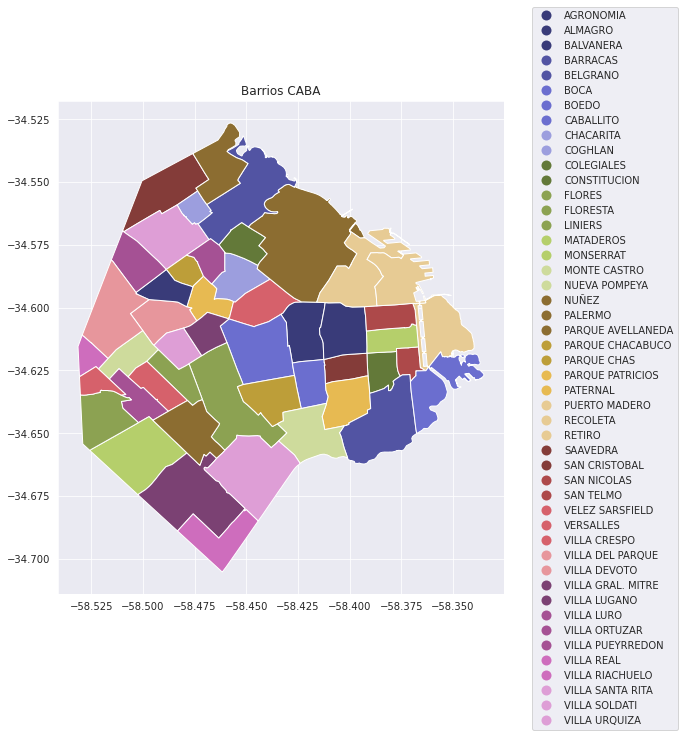

In [93]:
# Realizo el grafico de los barrios de CABA
fig, ax = plt.subplots(figsize=(8, 10))
barrios.plot(column='BARRIO', categorical=True, legend=True, ax=ax, cmap='tab20b')

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.4, 1.2))

ax.set(title='Barrios CABA')
plt.show()

## Analisis de Valores Atipicos

### Univariados

#### Metodo IQR

In [94]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()


In [95]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max

In [96]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

##### Ambientes

cantidad de datos del ds: 74343
outliers encontrados para los property_rooms: 1183
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


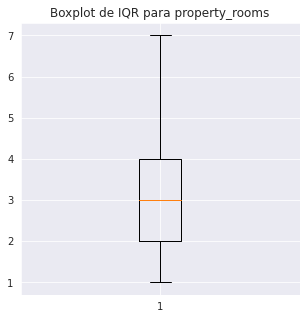

In [97]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

Tomaremos 7 como límite superior y 0 como límite inferior ya que no tiene sentido que haya cantidad de habitaciones negativas.

In [98]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")



Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 569. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 162. Constituyen al 0% de los datos


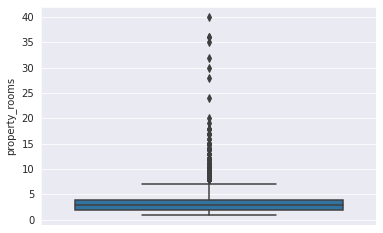

In [99]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Eliminamos los ambientes que son > 7 ya que rompen la media y representan solamente a un porcentaje minúsculo del dataset (1% sobre el 100% del ds).

In [100]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


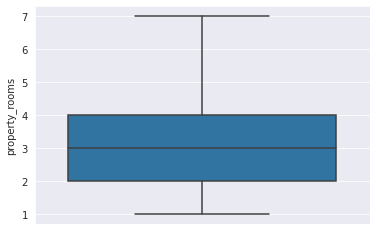

In [101]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Habitaciones

Moderated outliers limits [min: -2.0,max: 6.0]
Severe outliers limits [min: -5.0,max: 9.0]


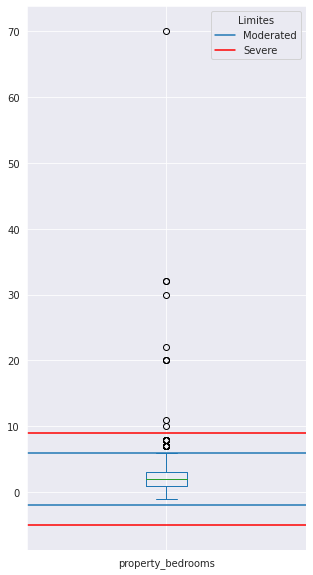

In [102]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73774
outliers encontrados para los property_bedrooms: 147
hay 0% de outliers de property_bedrooms sobre el ds
limit sup: 6.0, limite inf: -2.0


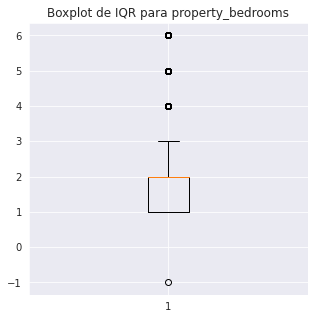

In [103]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [104]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")


Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 29. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 5. Constituyen al 0% de los datos


###### Eliminaremos una observacion en particular que fue detectada como outlier ya que dice tener -1 habitaciones. Este valor no tiene ningun sentido logico en nuestro domino de problema.


In [105]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar:                               id start_date   end_date    latitud   longitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg== 2021-01-07 2021-03-18 -34.577595 -58.495185   

             place_l3 property_type  property_rooms  property_bedrooms  \
406880  Villa Urquiza  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  \
406880                    61.0                      43.0        125000.0   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en train
filas a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en test


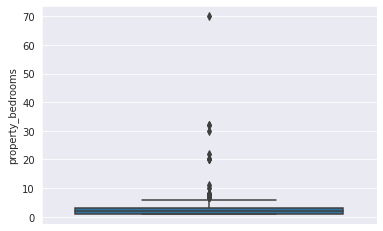

In [106]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

###### Cuando analizamos los valores atipicos detectados notamos que algunas observaciones eran mayores a los ambientes, esto no es posible en nuestro dominio de problema. Por ende, procederemos a eliminarlos. Podemos hacer esto ya que estos valores representan un valor minusculo del dataset.

In [107]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_bedrooms])}")

Ejemplos: 


14

In [108]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 29 registros en train
Se han eliminado: 5 registros en test


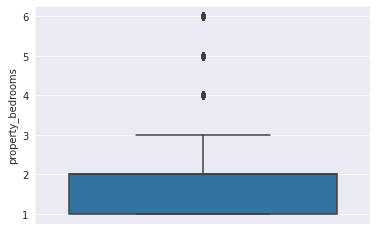

In [109]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

##### Superficie Total

cantidad de datos del ds: 73744
outliers encontrados para los property_surface_total: 5920
hay 8% de outliers de property_surface_total sobre el ds
limit sup: 186.5, limite inf: -41.5


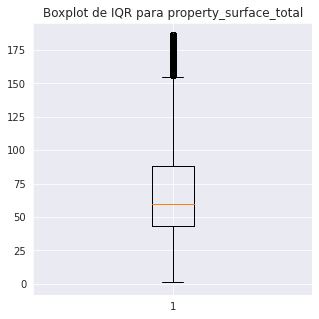

In [110]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

Elegimos tomar como outlier a viviendas que tengan una superifice menor a 18 ya que, en base a los documentos que leimos, este es el minimo necesario para que una persona viva en una vivienda. 18 m2 minimo. Observar los links adjuntos:

https://observatoriociudad.org/microdepartamentos-y-codigo-de-edificacion/

http://ssplan.buenosaires.gob.ar/webfiles/100_preguntas/ce_art_3_8_1_1_1_areas_y_lados_minimos_de_locales_de_vivienda_individual_y_colectiva.pdf

###### Eliminaremos las viviendas que tienen menos de 18 m2 de superficie

In [111]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 78 registros en train
Se han eliminado: 15 registros en test


In [112]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -127.0, 272.0


In [113]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")


Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5598. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1330. Constituyen al 7% de los datos


Visualizamos nuevamente el box-plot para entender que valores tienen las nuevas observaciones atipicas y ver si debemos seguir eliminando

Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


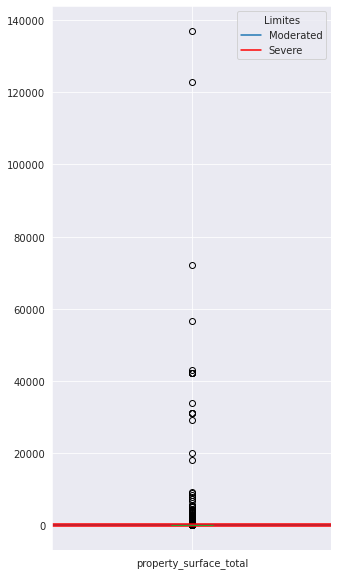

In [114]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

Como tenemos outliers muy altos, el boxplot no se aprecia. Tomaremos solo los outliers severos para un primer análisis

0-272       3243
272-500     2076
500-750      181
1000-inf      79
750-1000      19
Name: property_surface_total, dtype: int64


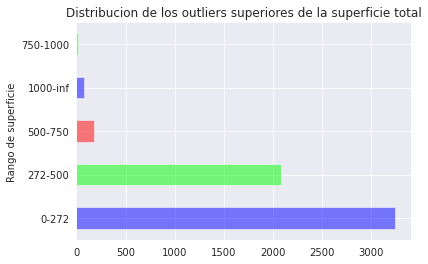

In [115]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [116]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")

Si bien la mediana de la superficite total es 220.0 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [117]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers superiores de sup total en train son: 279. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 279. Constituyen al 0% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


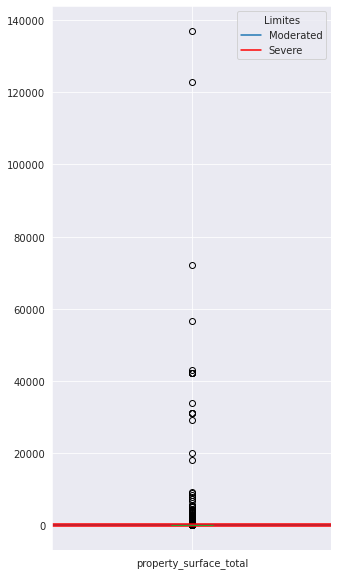

In [118]:
boxplot_with_outliers(ds_train, 'property_surface_total')

###### Procederemos a eliminar las superifices mayores a 500m^2

In [119]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 279 registros en train
Se han eliminado: 87 registros en test


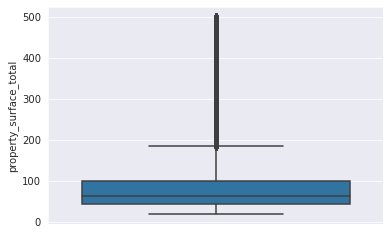

In [120]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

##### Superficie cubierta

cantidad de datos del ds: 73387
outliers encontrados para los property_surface_covered: 5831
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


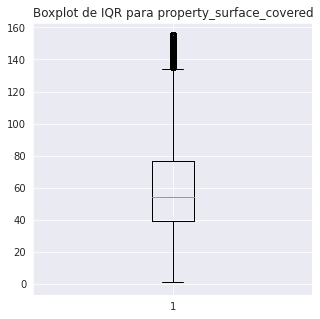

In [121]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [122]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5738. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1341. Constituyen al 7% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


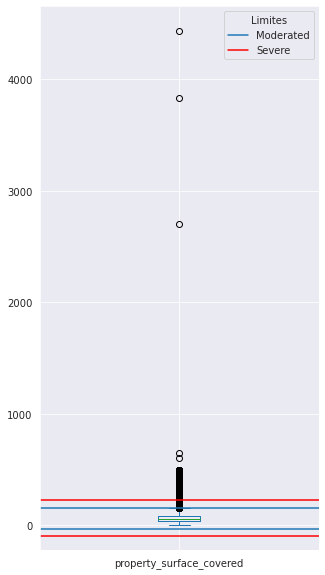

In [123]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Como hay algunas observacion demasiado anómalas, las excluímos para ver mejor

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


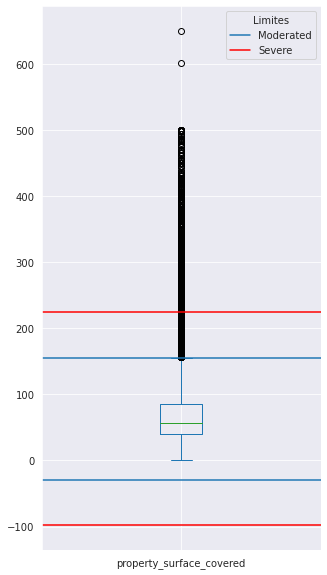

In [124]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3212
224-500     2299
500-750       62
1000-inf      17
750-1000       8
Name: property_surface_covered, dtype: int64


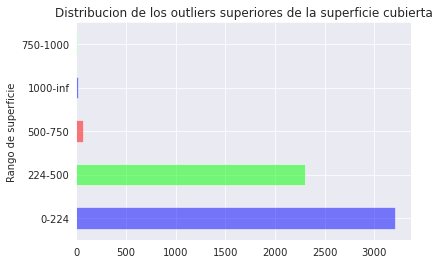

In [125]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

Inspeccionaremos los datos que se encuentran entre 224 y 500 $m^2$ de superficie cubierta

###### Como decidimos tomar como maximo valor de superificie total 500m^2, ese tambien va a ser nuestro maximo limite para la superificie cubierta para mantener la coherencia y el sentido en nuestro dominio. Procederemos a eliminar los valores que se encuentren por arriba. 

In [126]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 5 registros en train
Se han eliminado: 2 registros en test


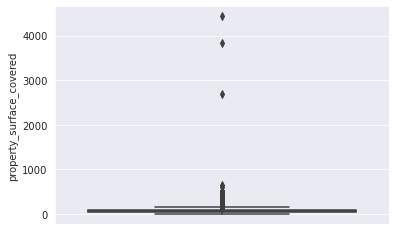

In [127]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

##### Latitud y longitud

cantidad de datos del ds: 73387
outliers encontrados para los latitud: 434
hay 0% de outliers de latitud sobre el ds
limit sup: -34.520186650650004, limite inf: -34.67254278224999


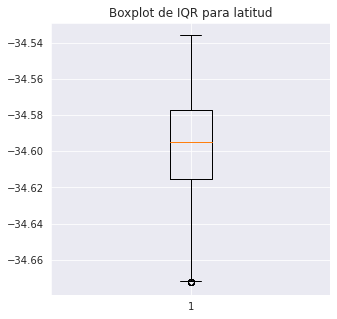

In [128]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73387
outliers encontrados para los longitud: 85
hay 0% de outliers de longitud sobre el ds
limit sup: -58.324818375, limite inf: -58.549910575000006


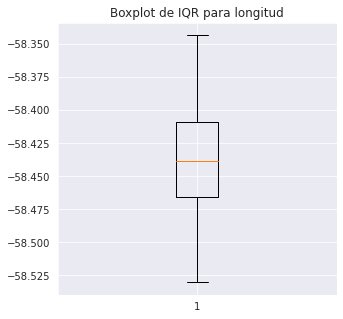

In [129]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

Los datos de latitud y longitud son dificiles de analizar por medio del rango intercuartil dado que los datos representan variaciones muy pequeñas y no son faciles de imaginar sin una ubicación en el mapa. Haremos este análisis más adelante.

In [130]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73314. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 73. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17724. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 23. Constituyen al 0% de los datos


#### Metodo Z score

In [131]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

Analisis de outliers con el metodo zscore para los ambientes

##### Ambientes

In [132]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para el caso de la variable Rooms

In [133]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 550. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 550. Constituyen al 3% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos


Aunque Zscore haya encontrado outliers, no consideramos que haya algun motivo valido para borrar estos datos. Por otro lado, corrimos Zscore modificado y despues de haber borrado los outliers por el metodo de IQR, no detecto ningun outlier. Proseguiremos sin borrar mas nada para rooms

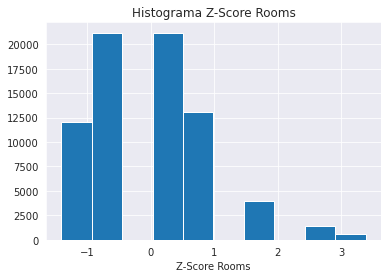

In [134]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

##### Habitaciones

In [135]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [136]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 663.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 663.Constituyen al 3% de los datos


id start_date   end_date    latitud   longitud  \
227599  HudNHXoUv5/ZeM2bhXtN2g== 2021-02-12 2021-11-06 -34.639002 -58.427755   
167623  S4Ifdgk9//Ja/TJ/MTtsMQ== 2021-04-30 2021-06-05 -34.560353 -58.451236   
67535   wGmeQCYG4+n0C9hsuNJBEw== 2021-08-02 2021-12-17 -34.595695 -58.390751   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 -38.964493 -68.075830   
151435  44ujdTSFo3OgQplLdPHl3g== 2021-08-05 2022-02-09 -34.643600 -58.438389   
...                          ...        ...        ...        ...        ...   
433068  fBy3vhLm7Wr7tQiIHTsMww== 2021-05-04 2021-05-18 -34.630963 -58.491281   
160825  OoYSgYpTstswV4gp3oIOGg== 2021-10-07 2022-02-17 -34.635256 -58.415725   
428098  GVRyox6PrWjmcXkyIs1MEg== 2021-12-16 2022-01-27 -34.595470 -58.384464   
218024  PfsQ+ewdkGLHWWNt1AGmfA== 2021-11-30 2022-01-27 -34.609986 -58.401980   
439349  ZlsXJ2PCT8/p4ax5ZGmcFA== 2021-04-23 2021-04-27 -34.595693 -58.397231   

                place_l3 property_type  property_rooms  property_bedrooms  \
227599  Parque Chacabuco          Casa             7.0                5.0   
167623          Belgrano  Departamento             7.0                5.0   
67535           Recoleta  Departamento             6.0                5.0   
410404               NaN          Casa             7.0                5.0   
151435  Parque Chacabuco          Casa             5.0                5.0   
...                  ...           ...             ...                ...   
433068          Floresta          Casa             6.0                5.0   
160825             Boedo          Casa             6.0                5.0   
428098          Recoleta  Departamento             7.0                5.0   
218024         Balvanera            PH             6.0                5.0   
439349      Barrio Norte  Departamento             7.0                6.0   

        property_surface_total  property_surface_covered  property_price  \
227599                   185.0                     132.0        285000.0   
167623                   300.0                     285.0        890000.0   
67535                    297.0                     295.0        490000.0   
410404                   218.0                     218.0        230000.0   
151435                   260.0                     188.0        195000.0   
...                        ...                       ...             ...   
433068                   239.0                     198.0        170000.0   
160825                   268.0                     268.0        390000.0   
428098                   380.0                     320.0        690000.0   
218024                   180.0                     180.0        175000.0   
439349                    78.0                      78.0        135000.0   

                                           property_title  z_property_bedrooms  
227599  Casa 7 ambientes con terraza y cochera - Parqu...             3.291196  
167623  Barrancas de Belgrano torre  Piso 4 dormitorio...             3.291196  
67535   Espectacular Piso en venta - Av. Santa Fe 1600...             3.291196  
410404  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...             3.291196  
151435  Casa Multifam- Pileta-Parque-Garage_Pq. Chacabuco             3.291196  
...                                                   ...                  ...  
433068        VENTA CASA 6 AMBIENTES CON TERRAZA - FLORES             3.291196  
160825  Casa 6 ambientes con dependencia y jardín - Boedo             3.291196  
428098  OPORTUNIDAD UNICA! MARAVILLOSO PISO DE 380 M2 ...             3.291196  
218024   PH 180 m2 - 6 ambientes con Cochera en Balvanera             3.291196  
439349  VENTA CONSULTORIO MEDICO 5 despachos, 2 salas ...             4.339626  

[663 rows x 14 columns]

In [137]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

Mismo caso que para los rooms, al haber borrado los outliers de bedrooms por el metodo IQR notamos que al correr Zscore modificado ya no hay outliers aunque Zscore si detecta algunos. No los eliminaremos porque tras analizar el dataset resultante no vemos ningun valor extraño en nuestro dominio.

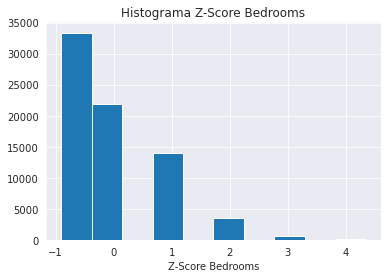

In [138]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

##### Superficie Total

In [139]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [140]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1838. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1838. Constituyen al 10% de los datos


id start_date   end_date    latitud   longitud  \
347314  yXwELoRDddQzy0+eVFNEMA== 2021-09-30 2022-03-09 -34.626658 -58.487240   
161013  mZA6df7uZ1vG2Pl/cILroQ== 2021-10-07 2021-11-19 -34.541728 -58.467025   
451178  u3fOV+uX8SMbsvlteIHZjQ== 2021-12-16 2022-03-25 -34.641144 -58.378379   
387643  MGM2azMohIovCwT8jcExeQ== 2021-03-30 2021-04-27 -34.612009 -58.475824   
67170   C6K+Qf0psw/zLg3RY00Odw== 2021-08-02 2021-08-30 -34.564829 -58.497503   

                place_l3 property_type  property_rooms  property_bedrooms  \
347314          Floresta            PH             5.0                4.0   
161013             Nuñez          Casa             5.0                3.0   
451178          Barracas  Departamento             4.0                3.0   
387643  Villa del Parque          Casa             5.0                4.0   
67170      Villa Urquiza          Casa             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
347314                   320.0                     190.0        249900.0   
161013                   349.0                     290.0        468000.0   
451178                   373.0                     303.0        475000.0   
387643                   320.0                     250.0        450000.0   
67170                    296.0                     296.0        595000.0   

                                           property_title  \
347314  Venta | PH | Floresta | Luminoso | 4 Dormitori...   
161013  Espectacular casa en tres Pisos  en en lo mejo...   
451178  Dpto 4 amb venta Barracas Triplex c/terraza pi...   
387643  VENTA CASA 4 AMB JARDÍN Y PILETA VILLA DEL PARQUE   
67170   Islandia 5500, Villa Urquiza - Acepta Permuta ...   

        z_property_surface_total  
347314                  3.544519  
161013                  3.983548  
451178                  4.346882  
387643                  3.544519  
67170                   3.181184

In [141]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore como outliers son aquellas viviendas que tienen mas de 200 m^2 pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

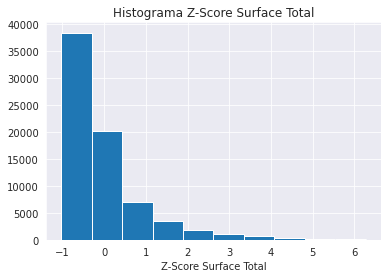

In [142]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

##### Superficie Cubierta

In [143]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [144]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 1486. Constituyen al 2% de los datos
Los outliers superiores de sup cubierta en test son: 1486. Constituyen al 8% de los datos


id start_date   end_date    latitud   longitud  \
238252  vLP7IpxuVqcQCqdeBfQuWg== 2021-02-27 2021-03-01 -34.581153 -58.405111   
161013  mZA6df7uZ1vG2Pl/cILroQ== 2021-10-07 2021-11-19 -34.541728 -58.467025   
85374   rOU7T003ECQgfFCT4ZizXg== 2021-03-26 2021-11-03 -34.565352 -58.434129   
451178  u3fOV+uX8SMbsvlteIHZjQ== 2021-12-16 2022-03-25 -34.641144 -58.378379   
67170   C6K+Qf0psw/zLg3RY00Odw== 2021-08-02 2021-08-30 -34.564829 -58.497503   
...                          ...        ...        ...        ...        ...   
428098  GVRyox6PrWjmcXkyIs1MEg== 2021-12-16 2022-01-27 -34.595470 -58.384464   
317364  QptwbSdwI6UURRyiWu3zvw== 2021-09-29 2021-10-27 -34.612289 -58.359324   
32451   eLm/vkEVGQ+ygSHnLLY9+g== 2021-12-04 2021-12-12 -34.565616 -58.442047   
397502  fp3u3zfzwbXg2tOnr3tTGA== 2021-02-13 2021-03-01 -34.568872 -58.432696   
392647  uuJKmBHT4Zp1k6XIef3z+w== 2021-10-28 2021-11-04 -34.576814 -58.465850   

             place_l3 property_type  property_rooms  property_bedrooms  \
238252        Palermo  Departamento             5.0                4.0   
161013          Nuñez          Casa             5.0                3.0   
85374         Palermo  Departamento             5.0                4.0   
451178       Barracas  Departamento             4.0                3.0   
67170   Villa Urquiza          Casa             5.0                4.0   
...               ...           ...             ...                ...   
428098       Recoleta  Departamento             7.0                5.0   
317364  Puerto Madero  Departamento             6.0                4.0   
32451        Belgrano  Departamento             6.0                4.0   
397502        Palermo  Departamento             5.0                3.0   
392647       Belgrano  Departamento             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
238252                   280.0                     280.0       1450000.0   
161013                   349.0                     290.0        468000.0   
85374                    283.0                     263.0        790000.0   
451178                   373.0                     303.0        475000.0   
67170                    296.0                     296.0        595000.0   
...                        ...                       ...             ...   
428098                   380.0                     320.0        690000.0   
317364                   426.0                     426.0       4000000.0   
32451                    289.0                     289.0        820000.0   
397502                   300.0                     300.0       2500000.0   
392647                   300.0                     300.0        850000.0   

                                           property_title  \
238252                             Departamento - Palermo   
161013  Espectacular casa en tres Pisos  en en lo mejo...   
85374   Espectacular piso frente al Hipodromo de 5 amb...   
451178  Dpto 4 amb venta Barracas Triplex c/terraza pi...   
67170   Islandia 5500, Villa Urquiza - Acepta Permuta ...   
...                                                   ...   
428098  OPORTUNIDAD UNICA! MARAVILLOSO PISO DE 380 M2 ...   
317364  VENTA importante PISO alto COMPLETO en torre E...   
32451   Depto en Torre - 7 amb - 290 m2 - 2 coch - Pis...   
397502    VENTA PENTHOUSE CAÑITAS 5 AMB 3 COCH AMENITIES    
392647  Piso de categoria hecho a nuevo en pleno Belgr...   

        z_property_surface_covered  
238252                    3.374261  
161013                    3.538731  
85374                     3.094662  
451178                    3.752542  
67170                     3.637413  
...                            ...  
428098                    4.032140  
317364                    5.775522  
32451                     3.522284  
397502                    3.703201  
392647                    3.703201  

[1486 rows x 14 columns]

In [145]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

Los outliers encontrados por Zscore son los valores que decidimos mantener. Se encuentran en el rango de > 200m^2 y < 500m^2. No eliminaremos nada. 

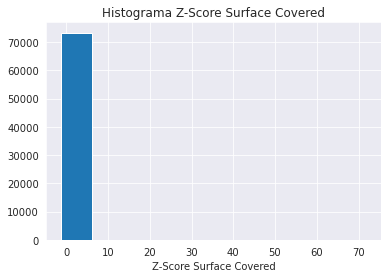

In [146]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

##### Latitud y Longitud

In [147]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [148]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 74. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 74. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 -32.962151 -60.646585   
9156    pY/8UqUbnzAmyeHnEDPDIQ== 2021-05-18 2021-11-04 -31.390431 -64.179004   
32740   nOBxQPld60VNJ2F6dcVY3w== 2021-02-08 2021-03-18 -31.678900 -63.879640   
57093   1ZEWcMLZlEAFQteSlGdqKw== 2021-04-20 2021-04-25 -34.009160 -63.924113   
370586  xqheD6mO22PsrH7l9+vn2g== 2021-04-24 2021-07-25 -33.081030 -68.468140   
...                          ...        ...        ...        ...        ...   
232780  h53LQcerdkVflydy+Ycpag== 2021-03-20 2021-04-16 -33.081030 -68.468140   
232782  oomNDfWx0vNNdjgZos7TBg== 2021-03-20 2021-06-05 -31.632518 -65.055367   
234297  sb4Ig0U4gDt4iOEpTW4R9w== 2021-06-02 2021-06-05 -31.302107 -64.254654   
234899  wW3sjHf50MGk2LR+CzvLTQ== 2021-06-02 2021-06-13 -33.081689 -68.468828   
43776   X8cRCDhXHiXts6WCMqtU0g== 2021-11-23 2022-01-27 -29.413454 -66.856458   

       place_l3 property_type  property_rooms  property_bedrooms  \
102563      NaN  Departamento             1.0                1.0   
9156        NaN  Departamento             1.0                1.0   
32740       NaN          Casa             4.0                3.0   
57093       NaN  Departamento             2.0                1.0   
370586      NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
232780      NaN  Departamento             1.0                1.0   
232782      NaN  Departamento             5.0                3.0   
234297      NaN          Casa             4.0                3.0   
234899      NaN  Departamento             1.0                1.0   
43776       NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
102563                    47.0                      47.0         59000.0   
9156                      38.0                      38.0         55000.0   
32740                    405.0                     160.0        190000.0   
57093                     43.0                      40.0         84000.0   
370586                    52.0                      48.0         95000.0   
...                        ...                       ...             ...   
232780                    42.0                      37.0         57900.0   
232782                   130.0                     130.0         40000.0   
234297                   360.0                     145.0        155000.0   
234899                    42.0                      37.0         54000.0   
43776                     45.0                      45.0         50000.0   

                                           property_title  z_latitud  
102563            Departamento en venta de un dormitorio   10.526713  
9156    Depto en VENTA 1 dormitorio + cochera - Merlo ...  20.668241  
32740   Alquiler cada 4 amb B°Los Arces,La Cañada de P...  18.806892  
57093     Venta Depto 2amb c/balcon a Estrenar Saenz Peña   3.770881  
370586   VENTA 2 ambientes en Villa Ballester con COCHERA   9.759643  
...                                                   ...        ...  
232780  HERMOSO MONO A ESTRENAR,  AMENITIES, OPORTUNID...   9.759643  
232782   421- Dos departamentos al frente de la plaza ...  19.106174  
234297    Comarca de Allende , escritura , Recibo menor !  21.238153  
234899  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...   9.755388  
43776   Departamento VENTA - 1 dormitorio 1 baño - Cas...  33.424692  

[74 rows x 14 columns]

In [149]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 9. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 9. Constituyen al 0% de los datos


id start_date                      end_date  \
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 12:24:15.554154583   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 12:24:15.554154583   

          latitud   longitud place_l3 property_type  property_rooms  \
410404 -38.964493 -68.075830      NaN          Casa             7.0   
105792 -41.084900 -71.187159      NaN  Departamento             1.0   
155333 -41.164123 -71.415420      NaN          Casa             3.0   
106288 -40.131723 -71.299436      NaN  Departamento             2.0   
131188 -41.083002 -71.182747      NaN  Departamento             2.0   
208085 -41.085373 -71.185766      NaN  Departamento             2.0   
457631 -53.788624 -67.718089      NaN  Departamento             3.0   
106297 -41.086352 -71.185720      NaN  Departamento             2.0   
10486  -41.163826 -71.438923      NaN          Casa             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
410404                5.0                   218.0                     218.0   
105792                1.0                    53.0                      53.0   
155333                2.0                    70.0                      70.0   
106288                1.0                    44.0                      44.0   
131188                1.0                    66.0                      56.0   
208085                1.0                    60.0                      50.0   
457631                2.0                   121.0                     100.0   
106297                1.0                    53.0                      53.0   
10486                 3.0                   100.0                     100.0   

        property_price                                     property_title  \
410404        230000.0  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...   
105792        145000.0  Villa Huapi - Dina Huapi - Río Negro - APTO CR...   
155333        380000.0  HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C...   
106288        105000.0  Hermoso departamento en venta, totalmente equi...   
131188        135000.0  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO    
208085        142000.0  Excelente departamento en venta en Dina Huapi ...   
457631        375000.0                Depto 3 ambientes Arboris Las Lomas   
106297        145000.0  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...   
10486         410000.0  BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...   

         z_latitud  
410404  -28.203425  
105792  -41.885354  
155333  -42.396545  
106288  -35.734979  
131188  -41.873110  
208085  -41.888412  
457631 -123.856181  
106297  -41.894727  
10486   -42.394625

Comprarandolo con los valores de lat/long del gráfico de CABA, podemos ver que los datos corresponden a valores que no están dentro del rango. Procederemos a eliminarlos en base al zscore.

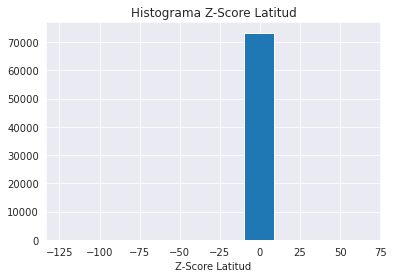

In [150]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [151]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id start_date   end_date    latitud   longitud  \
349343  7lLQ98X5oaLxEgvqvmRsvQ== 2021-04-16 2021-06-05 -34.578010 -58.433521   
85258   5qGj3aJea4zq0LZZfxmy1w== 2021-03-26 2021-08-03 -34.651827 -58.526738   
235356  uUAhHTxU/NZrxmafq9ebiQ== 2021-06-02 2021-06-05 -34.616692 -58.443128   
229126  oPATJOhauH8x0Z/U0xpTpg== 2021-03-08 2021-06-05 -34.630025 -58.480687   
162042  slWeGgNJWJejGGd5xxfU2Q== 2021-10-07 2021-12-30 -34.581411 -58.408848   

         place_l3 property_type  property_rooms  property_bedrooms  \
349343    Palermo  Departamento             1.0                1.0   
85258     Liniers  Departamento             2.0                1.0   
235356  Caballito  Departamento             1.0                1.0   
229126   Floresta  Departamento             3.0                2.0   
162042    Palermo  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
349343                    42.0                      32.0        119800.0   
85258                     49.0                      45.0         99000.0   
235356                    44.0                      38.0         93942.0   
229126                    58.0                      54.0        139000.0   
162042                    71.0                      65.0        319000.0   

                                           property_title  z_latitud  
349343                 Departamento Monoambiente- Palermo   0.100378  
85258                      VENTA - DEPARTAMENTO - LINIERS  -0.375930  
235356  Departamento - Caballito - Venta - Monoambient...  -0.149219  
229126  Exc.Departamento 3Amb. C. Comedor.Balcón Tza. ...  -0.235255  
162042  U$S 319.000  - VER VIDEO - 3 amb - Cochera y B...   0.078431

In [152]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 7. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 7. Constituyen al 0% de los datos


id start_date   end_date   latitud   longitud  \
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   

       place_l3 property_type  property_rooms  property_bedrooms  \
173667      NaN  Departamento             4.0                3.0   
220851      NaN          Casa             4.0                2.0   
241662      NaN          Casa             4.0                3.0   
134196      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
187631      NaN  Departamento             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
173667                    98.0                      88.0        269000.0   
220851                   105.0                     105.0        190000.0   
241662                   230.0                     200.0        255000.0   
134196                   105.0                     105.0        200000.0   
234893                    98.0                      88.0        269000.0   
405382                   205.0                     102.0        125000.0   
187631                   158.0                     150.0        380000.0   

                                           property_title  z_longitud  
173667  Venta departamento 4 amb Vicente Lopez con cochea   11.897241  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.112606  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   17.396268  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.112606  
234893  Venta departamento 4 amb Vicente Lopez con cochea   11.897241  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   17.396268  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    3.585108

In [153]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 75. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 75. Constituyen al 0% de los datos


id start_date                      end_date  \
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
9156    pY/8UqUbnzAmyeHnEDPDIQ== 2021-05-18 2021-11-04 00:00:00.000000000   
32740   nOBxQPld60VNJ2F6dcVY3w== 2021-02-08 2021-03-18 00:00:00.000000000   
57093   1ZEWcMLZlEAFQteSlGdqKw== 2021-04-20 2021-04-25 00:00:00.000000000   
...                          ...        ...                           ...   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
234297  sb4Ig0U4gDt4iOEpTW4R9w== 2021-06-02 2021-06-05 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 12:24:15.554154583   
234899  wW3sjHf50MGk2LR+CzvLTQ== 2021-06-02 2021-06-13 00:00:00.000000000   
43776   X8cRCDhXHiXts6WCMqtU0g== 2021-11-23 2022-01-27 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
102563 -32.962151 -60.646585      NaN  Departamento             1.0   
410404 -38.964493 -68.075830      NaN          Casa             7.0   
9156   -31.390431 -64.179004      NaN  Departamento             1.0   
32740  -31.678900 -63.879640      NaN          Casa             4.0   
57093  -34.009160 -63.924113      NaN  Departamento             2.0   
...           ...        ...      ...           ...             ...   
106297 -41.086352 -71.185720      NaN  Departamento             2.0   
234297 -31.302107 -64.254654      NaN          Casa             4.0   
10486  -41.163826 -71.438923      NaN          Casa             4.0   
234899 -33.081689 -68.468828      NaN  Departamento             1.0   
43776  -29.413454 -66.856458      NaN  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
102563                1.0                    47.0                      47.0   
410404                5.0                   218.0                     218.0   
9156                  1.0                    38.0                      38.0   
32740                 3.0                   405.0                     160.0   
57093                 1.0                    43.0                      40.0   
...                   ...                     ...                       ...   
106297                1.0                    53.0                      53.0   
234297                3.0                   360.0                     145.0   
10486                 3.0                   100.0                     100.0   
234899                1.0                    42.0                      37.0   
43776                 1.0                    45.0                      45.0   

        property_price                                     property_title  \
102563         59000.0            Departamento en venta de un dormitorio    
410404        230000.0  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...   
9156           55000.0  Depto en VENTA 1 dormitorio + cochera - Merlo ...   
32740         190000.0  Alquiler cada 4 amb B°Los Arces,La Cañada de P...   
57093          84000.0    Venta Depto 2amb c/balcon a Estrenar Saenz Peña   
...                ...                                                ...   
106297        145000.0  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...   
234297        155000.0    Comarca de Allende , escritura , Recibo menor !   
10486         410000.0  BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...   
234899         54000.0  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...   
43776          50000.0  Departamento VENTA - 1 dormitorio 1 baño - Cas...   

        z_longitud  
102563   -8.880954  
410404  -38.853668  
9156    -23.132226  
32740   -21.924465  
57093   -22.103887  
...            ...  
106297  -51.400277  
234297  -23.437429  
10486   -52.421805  
234899  -40.439189  
43776   -33.934206  

[75 rows x 14 columns]

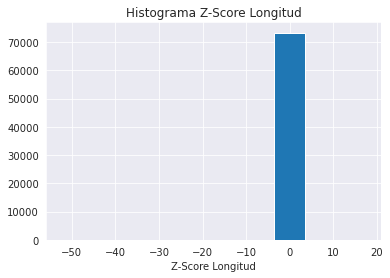

In [154]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

#### Metodo Z Score modificado

In [155]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

##### Ambientes

In [156]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para la variable Rooms en el zscore modificado

In [157]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [158]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

Notamos que despues de haber borrado los outliers por el metodo de IQR para rooms, no se detectan outliers por este metodo. Lo mas seguro es que hayan sido outliers compartidos, al borrarlos por un metodo la interseccion nos da vacio.

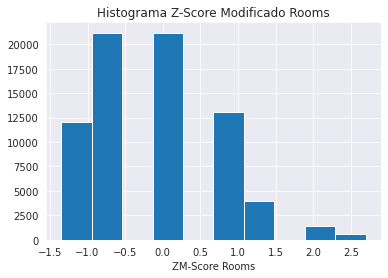

In [159]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

##### Habitaciones

In [160]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [161]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [162]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

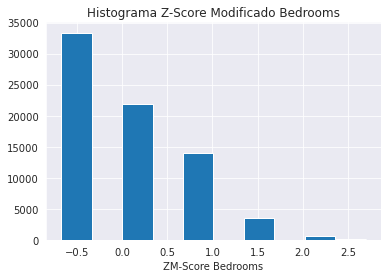

In [163]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

##### Superficie Total

In [164]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id start_date   end_date    latitud   longitud  \
349343  7lLQ98X5oaLxEgvqvmRsvQ== 2021-04-16 2021-06-05 -34.578010 -58.433521   
85258   5qGj3aJea4zq0LZZfxmy1w== 2021-03-26 2021-08-03 -34.651827 -58.526738   
235356  uUAhHTxU/NZrxmafq9ebiQ== 2021-06-02 2021-06-05 -34.616692 -58.443128   
229126  oPATJOhauH8x0Z/U0xpTpg== 2021-03-08 2021-06-05 -34.630025 -58.480687   
162042  slWeGgNJWJejGGd5xxfU2Q== 2021-10-07 2021-12-30 -34.581411 -58.408848   

         place_l3 property_type  property_rooms  property_bedrooms  \
349343    Palermo  Departamento             1.0                1.0   
85258     Liniers  Departamento             2.0                1.0   
235356  Caballito  Departamento             1.0                1.0   
229126   Floresta  Departamento             3.0                2.0   
162042    Palermo  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
349343                    42.0                      32.0        119800.0   
85258                     49.0                      45.0         99000.0   
235356                    44.0                      38.0         93942.0   
229126                    58.0                      54.0        139000.0   
162042                    71.0                      65.0        319000.0   

                                           property_title  \
349343                 Departamento Monoambiente- Palermo   
85258                      VENTA - DEPARTAMENTO - LINIERS   
235356  Departamento - Caballito - Venta - Monoambient...   
229126  Exc.Departamento 3Amb. C. Comedor.Balcón Tza. ...   
162042  U$S 319.000  - VER VIDEO - 3 amb - Cochera y B...   

        zm_property_surface_total  
349343                  -0.618292  
85258                   -0.421563  
235356                  -0.562083  
229126                  -0.168625  
162042                   0.196729

Verificamos si se cumple la regla de oro para la variable sup total en el zscore modificado

In [165]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5518. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5518. Constituyen al 31% de los datos


id start_date   end_date    latitud   longitud  \
347314  yXwELoRDddQzy0+eVFNEMA== 2021-09-30 2022-03-09 -34.626658 -58.487240   
258361  KywWcz+TalAuA7vuVN0nxw== 2021-11-03 2022-01-27 -34.617978 -58.362848   
238252  vLP7IpxuVqcQCqdeBfQuWg== 2021-02-27 2021-03-01 -34.581153 -58.405111   
161013  mZA6df7uZ1vG2Pl/cILroQ== 2021-10-07 2021-11-19 -34.541728 -58.467025   
85374   rOU7T003ECQgfFCT4ZizXg== 2021-03-26 2021-11-03 -34.565352 -58.434129   
...                          ...        ...        ...        ...        ...   
162510  2JHVWEzXhVEzI3gqUIJLTQ== 2021-10-07 2022-01-27 -34.588678 -58.408436   
214627  yTzCnQUKT+am4uQClS9FKw== 2021-12-27 2022-01-27 -34.580108 -58.480912   
75734   N8m5ZU8G/aN5a5KfJS9zvg== 2021-04-08 2022-02-09 -34.574433 -58.501356   
121279  QeiXvU7Kn74Ao4l2eqfz7A== 2021-05-13 2021-05-16 -34.592027 -58.388292   
75983   oizi9P7B4rHQeFH2wOZA+A== 2021-07-17 2021-10-06 -34.632768 -58.461038   

             place_l3 property_type  property_rooms  property_bedrooms  \
347314       Floresta            PH             5.0                4.0   
258361  Puerto Madero  Departamento             4.0                3.0   
238252        Palermo  Departamento             5.0                4.0   
161013          Nuñez          Casa             5.0                3.0   
85374         Palermo  Departamento             5.0                4.0   
...               ...           ...             ...                ...   
162510   Barrio Norte  Departamento             5.0                4.0   
214627  Villa Urquiza  Departamento             4.0                3.0   
75734   Villa Urquiza            PH             5.0                4.0   
121279       Recoleta  Departamento             5.0                3.0   
75983          Flores          Casa             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
347314                   320.0                     190.0        249900.0   
258361                   253.0                     187.0       1580000.0   
238252                   280.0                     280.0       1450000.0   
161013                   349.0                     290.0        468000.0   
85374                    283.0                     263.0        790000.0   
...                        ...                       ...             ...   
162510                   231.0                     203.0        415000.0   
214627                   301.0                     182.0        490000.0   
75734                    195.0                     125.0        217000.0   
121279                   500.0                     130.0        380000.0   
75983                    242.0                     107.0        245000.0   

                                           property_title  \
347314  Venta | PH | Floresta | Luminoso | 4 Dormitori...   
258361                 Departamento - Puerto Madero SLS !   
238252                             Departamento - Palermo   
161013  Espectacular casa en tres Pisos  en en lo mejo...   
85374   Espectacular piso frente al Hipodromo de 5 amb...   
...                                                   ...   
162510  VENTA O PERMUTA PISO DE 5 AMBIENTES CON COCHER...   
214627  Piso en triplex de 4 amb. a Estrenar!!!! 3 dor...   
75734   VENTA PH 5 AMB VILLA URQUIZA TERRAZA ESPACIO A...   
121279  LUMINOSA, 3 DORM, COCHERA, BAULERA ,132 m RECO...   
75983           Departamento tipo casa en venta en Flores   

        zm_property_surface_total  
347314                   7.194667  
258361                   5.311687  
238252                   6.070500  
161013                   8.009688  
85374                    6.154812  
...                           ...  
162510                   4.693396  
214627                   6.660688  
75734                    3.681646  
121279                  12.253417  
75983                    5.002542  

[5518 rows x 14 columns]

In [166]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore Modificado, asi como tambien el Zscore, son aquellas viviendas que tienen mas de 200 m^2 y menos de 500m^2pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

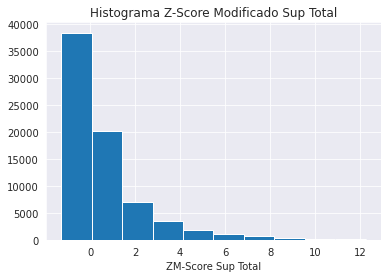

In [167]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

##### Superficie Cubierta

In [168]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

Verificamos si se cumple la regla de oro para la variable sup cubierta en el zscore modificado

In [169]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id start_date   end_date    latitud   longitud  \
347314  yXwELoRDddQzy0+eVFNEMA== 2021-09-30 2022-03-09 -34.626658 -58.487240   
258361  KywWcz+TalAuA7vuVN0nxw== 2021-11-03 2022-01-27 -34.617978 -58.362848   
238252  vLP7IpxuVqcQCqdeBfQuWg== 2021-02-27 2021-03-01 -34.581153 -58.405111   
161013  mZA6df7uZ1vG2Pl/cILroQ== 2021-10-07 2021-11-19 -34.541728 -58.467025   
81883   zgm6gSNSXDbfiDlznBzdBg== 2021-03-12 2021-06-05 -34.596827 -58.402562   
...                          ...        ...        ...        ...        ...   
340705  /AYUA3NSX2fJno5TkMBdgw== 2021-09-28 2022-01-27 -34.642378 -58.519193   
321468  w1WVUWi5BCkWxM8G2ZZong== 2021-09-03 2022-01-27 -34.591371 -58.405355   
162510  2JHVWEzXhVEzI3gqUIJLTQ== 2021-10-07 2022-01-27 -34.588678 -58.408436   
214627  yTzCnQUKT+am4uQClS9FKw== 2021-12-27 2022-01-27 -34.580108 -58.480912   
130840  z/GzDAdpmW5p/FLlJjOvTg== 2021-05-27 2021-06-01 -34.669249 -58.474285   

             place_l3 property_type  property_rooms  property_bedrooms  \
347314       Floresta            PH             5.0                4.0   
258361  Puerto Madero  Departamento             4.0                3.0   
238252        Palermo  Departamento             5.0                4.0   
161013          Nuñez          Casa             5.0                3.0   
81883         Palermo  Departamento             5.0                3.0   
...               ...           ...             ...                ...   
340705        Liniers          Casa             3.0                2.0   
321468   Barrio Norte  Departamento             5.0                4.0   
162510   Barrio Norte  Departamento             5.0                4.0   
214627  Villa Urquiza  Departamento             4.0                3.0   
130840   Villa Lugano          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
347314                   320.0                     190.0        249900.0   
258361                   253.0                     187.0       1580000.0   
238252                   280.0                     280.0       1450000.0   
161013                   349.0                     290.0        468000.0   
81883                    183.0                     183.0        595000.0   
...                        ...                       ...             ...   
340705                   195.0                     195.0        290000.0   
321468                   175.0                     175.0        540000.0   
162510                   231.0                     203.0        415000.0   
214627                   301.0                     182.0        490000.0   
130840                   164.0                     164.0        340000.0   

                                           property_title  \
347314  Venta | PH | Floresta | Luminoso | 4 Dormitori...   
258361                 Departamento - Puerto Madero SLS !   
238252                             Departamento - Palermo   
161013  Espectacular casa en tres Pisos  en en lo mejo...   
81883                      Espectacular piso en Recoleta!   
...                                                   ...   
340705                                     Casa - Liniers   
321468  EXCELENTE DEPTO. TIPO CASA CON HERMOSO JARDIN ...   
162510  VENTA O PERMUTA PISO DE 5 AMBIENTES CON COCHER...   
214627  Piso en triplex de 4 amb. a Estrenar!!!! 3 dor...   
130840                                Casa - Villa Lugano   

        zm_property_surface_covered  
347314                     4.485425  
258361                     4.384250  
238252                     7.520675  
161013                     7.857925  
81883                      4.249350  
...                             ...  
340705                     4.654050  
321468                     3.979550  
162510                     4.923850  
214627                     4.215625  
130840                     3.608575  

[5261 rows x 14 columns]

In [170]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

Mismo caso que el explicado para Zscore, Zscore modificado esta tomando como outliers a las superificies cubiertas que estan entre 200 y 500 m^2, nosotros optamos por mantener este valor ya nos parece valido, no eliminaremos nada.

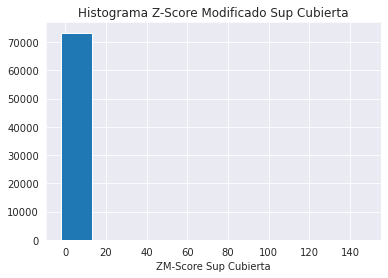

In [171]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

##### Latitud y longitud

In [172]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

Verificamos si se cumple la regla de oro para la variable latitud en el zscore modificado

In [173]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id start_date   end_date    latitud   longitud  \
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 -32.962151 -60.646585   
9156    pY/8UqUbnzAmyeHnEDPDIQ== 2021-05-18 2021-11-04 -31.390431 -64.179004   
32740   nOBxQPld60VNJ2F6dcVY3w== 2021-02-08 2021-03-18 -31.678900 -63.879640   
57093   1ZEWcMLZlEAFQteSlGdqKw== 2021-04-20 2021-04-25 -34.009160 -63.924113   
370586  xqheD6mO22PsrH7l9+vn2g== 2021-04-24 2021-07-25 -33.081030 -68.468140   
...                          ...        ...        ...        ...        ...   
232780  h53LQcerdkVflydy+Ycpag== 2021-03-20 2021-04-16 -33.081030 -68.468140   
232782  oomNDfWx0vNNdjgZos7TBg== 2021-03-20 2021-06-05 -31.632518 -65.055367   
234297  sb4Ig0U4gDt4iOEpTW4R9w== 2021-06-02 2021-06-05 -31.302107 -64.254654   
234899  wW3sjHf50MGk2LR+CzvLTQ== 2021-06-02 2021-06-13 -33.081689 -68.468828   
43776   X8cRCDhXHiXts6WCMqtU0g== 2021-11-23 2022-01-27 -29.413454 -66.856458   

       place_l3 property_type  property_rooms  property_bedrooms  \
102563      NaN  Departamento             1.0                1.0   
9156        NaN  Departamento             1.0                1.0   
32740       NaN          Casa             4.0                3.0   
57093       NaN  Departamento             2.0                1.0   
370586      NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
232780      NaN  Departamento             1.0                1.0   
232782      NaN  Departamento             5.0                3.0   
234297      NaN          Casa             4.0                3.0   
234899      NaN  Departamento             1.0                1.0   
43776       NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
102563                    47.0                      47.0         59000.0   
9156                      38.0                      38.0         55000.0   
32740                    405.0                     160.0        190000.0   
57093                     43.0                      40.0         84000.0   
370586                    52.0                      48.0         95000.0   
...                        ...                       ...             ...   
232780                    42.0                      37.0         57900.0   
232782                   130.0                     130.0         40000.0   
234297                   360.0                     145.0        155000.0   
234899                    42.0                      37.0         54000.0   
43776                     45.0                      45.0         50000.0   

                                           property_title  zm_latitud  
102563            Departamento en venta de un dormitorio    57.848174  
9156    Depto en VENTA 1 dormitorio + cochera - Merlo ...  113.520954  
32740   Alquiler cada 4 amb B°Los Arces,La Cañada de P...  103.302922  
57093     Venta Depto 2amb c/balcon a Estrenar Saenz Peña   20.761459  
370586   VENTA 2 ambientes en Villa Ballester con COCHERA   53.637279  
...                                                   ...         ...  
232780  HERMOSO MONO A ESTRENAR,  AMENITIES, OPORTUNID...   53.637279  
232782   421- Dos departamentos al frente de la plaza ...  104.945857  
234297    Comarca de Allende , escritura , Recibo menor !  116.649535  
234899  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...   53.613919  
43776   Departamento VENTA - 1 dormitorio 1 baño - Cas...  183.548579  

[76 rows x 14 columns]

In [174]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 18. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 18. Constituyen al 0% de los datos


id start_date                      end_date  \
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
308365  j4l0DxeSfN6KnNMYSo6bSg== 2021-04-28 2021-05-01 00:00:00.000000000   
65844   0tGMaOsXgkOAnx8GSH1pmA== 2021-05-15 2021-05-25 00:00:00.000000000   
171545  2IMMhWMUVZd6htI0Xo9m8Q== 2021-04-19 2021-06-05 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
411779  jt4VEm3y2Ktb573eFDHQUw== 2021-03-02 2021-03-12 00:00:00.000000000   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
250707  n/VGq/lp+AH1XRd4RSHphg== 2021-04-29 2021-05-15 00:00:00.000000000   
82540   j0CggSFoqC9J+F1N9h91wg== 2021-03-12 2021-03-13 00:00:00.000000000   
271609  pMxqmA1WxzslUoiQPG4qFg== 2021-06-19 2021-07-05 00:00:00.000000000   
351916  BKk+pz+G7Tajvr6LE+9UZw== 2021-06-25 2021-07-17 00:00:00.000000000   
317537  x1BlLb49Up0aSX9yuzhrMw== 2021-09-29 2022-03-25 00:00:00.000000000   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 12:24:15.554154583   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 12:24:15.554154583   

          latitud   longitud         place_l3 property_type  property_rooms  \
410404 -38.964493 -68.075830              NaN          Casa             7.0   
308365 -34.694900 -58.469161     Villa Lugano          Casa             2.0   
65844  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
171545 -34.694322 -58.469549     Villa Lugano            PH             3.0   
105792 -41.084900 -71.187159              NaN  Departamento             1.0   
155333 -41.164123 -71.415420              NaN          Casa             3.0   
411779 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
106288 -40.131723 -71.299436              NaN  Departamento             2.0   
131188 -41.083002 -71.182747              NaN  Departamento             2.0   
250707 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
82540  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
271609 -34.694451 -58.467532     Villa Lugano          Casa             3.0   
351916 -34.694900 -58.469161     Villa Lugano          Casa             2.0   
317537 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
208085 -41.085373 -71.185766              NaN  Departamento             2.0   
457631 -53.788624 -67.718089              NaN  Departamento             3.0   
106297 -41.086352 -71.185720              NaN  Departamento             2.0   
10486  -41.163826 -71.438923              NaN          Casa             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
410404                5.0                   218.0                     218.0   
308365                1.0                    80.0                      80.0   
65844                 3.0                    91.0                      79.0   
171545                2.0                    70.0                      70.0   
105792                1.0                    53.0                      53.0   
155333                2.0                    70.0                      70.0   
411779                3.0                    91.0                      79.0   
106288                1.0                    44.0                      44.0   
131188                1.0                    66.0                      56.0   
250707                3.0                    91.0                      79.0   
82540                 3.0                    91.0                      79.0   
271609                2.0                    70.0                      50.0   
351916                1.0            

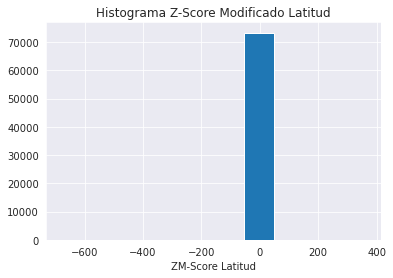

In [175]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [176]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

Verificamos si se cumple la regla de oro para la variable longitud en el zscore modificado

In [177]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id start_date   end_date   latitud   longitud  \
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   

       place_l3 property_type  property_rooms  property_bedrooms  \
173667      NaN  Departamento             4.0                3.0   
220851      NaN          Casa             4.0                2.0   
241662      NaN          Casa             4.0                3.0   
134196      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
187631      NaN  Departamento             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
173667                    98.0                      88.0        269000.0   
220851                   105.0                     105.0        190000.0   
241662                   230.0                     200.0        255000.0   
134196                   105.0                     105.0        200000.0   
234893                    98.0                      88.0        269000.0   
405382                   205.0                     102.0        125000.0   
187631                   158.0                     150.0        380000.0   

                                           property_title  zm_longitud  
173667  Venta departamento 4 amb Vicente Lopez con cochea    70.787824  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.256765  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   103.578839  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.256765  
234893  Venta departamento 4 amb Vicente Lopez con cochea    70.787824  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   103.578839  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    21.222093

In [178]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 78. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 78. Constituyen al 0% de los datos


id start_date                      end_date  \
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
9156    pY/8UqUbnzAmyeHnEDPDIQ== 2021-05-18 2021-11-04 00:00:00.000000000   
32740   nOBxQPld60VNJ2F6dcVY3w== 2021-02-08 2021-03-18 00:00:00.000000000   
57093   1ZEWcMLZlEAFQteSlGdqKw== 2021-04-20 2021-04-25 00:00:00.000000000   
...                          ...        ...                           ...   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
234297  sb4Ig0U4gDt4iOEpTW4R9w== 2021-06-02 2021-06-05 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 12:24:15.554154583   
234899  wW3sjHf50MGk2LR+CzvLTQ== 2021-06-02 2021-06-13 00:00:00.000000000   
43776   X8cRCDhXHiXts6WCMqtU0g== 2021-11-23 2022-01-27 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
102563 -32.962151 -60.646585      NaN  Departamento             1.0   
410404 -38.964493 -68.075830      NaN          Casa             7.0   
9156   -31.390431 -64.179004      NaN  Departamento             1.0   
32740  -31.678900 -63.879640      NaN          Casa             4.0   
57093  -34.009160 -63.924113      NaN  Departamento             2.0   
...           ...        ...      ...           ...             ...   
106297 -41.086352 -71.185720      NaN  Departamento             2.0   
234297 -31.302107 -64.254654      NaN          Casa             4.0   
10486  -41.163826 -71.438923      NaN          Casa             4.0   
234899 -33.081689 -68.468828      NaN  Departamento             1.0   
43776  -29.413454 -66.856458      NaN  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
102563                1.0                    47.0                      47.0   
410404                5.0                   218.0                     218.0   
9156                  1.0                    38.0                      38.0   
32740                 3.0                   405.0                     160.0   
57093                 1.0                    43.0                      40.0   
...                   ...                     ...                       ...   
106297                1.0                    53.0                      53.0   
234297                3.0                   360.0                     145.0   
10486                 3.0                   100.0                     100.0   
234899                1.0                    42.0                      37.0   
43776                 1.0                    45.0                      45.0   

        property_price                                     property_title  \
102563         59000.0            Departamento en venta de un dormitorio    
410404        230000.0  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...   
9156           55000.0  Depto en VENTA 1 dormitorio + cochera - Merlo ...   
32740         190000.0  Alquiler cada 4 amb B°Los Arces,La Cañada de P...   
57093          84000.0    Venta Depto 2amb c/balcon a Estrenar Saenz Peña   
...                ...                                                ...   
106297        145000.0  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...   
234297        155000.0    Comarca de Allende , escritura , Recibo menor !   
10486         410000.0  BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...   
234899         54000.0  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...   
43776          50000.0  Departamento VENTA - 1 dormitorio 1 baño - Cas...   

        zm_longitud  
102563   -53.113758  
410404  -231.842791  
9156    -138.094920  
32740   -130.892969  
57093   -131.962878  
...             ...  
106297  -306.658946  
234297  -139.914867  
10486   -312.750376  
234899  -241.297343  
43776   -202.507752  

[78 rows x 14 columns]

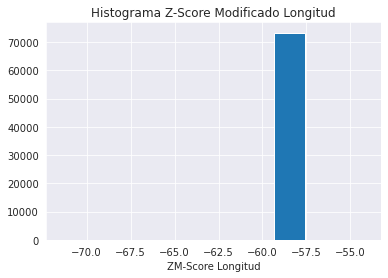

In [179]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

### Multivariados

#### Clustering - Mahalanobis

In [180]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X


In [181]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [182]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

##### Analisis entre ambientes y habitaciones de valores atipicos

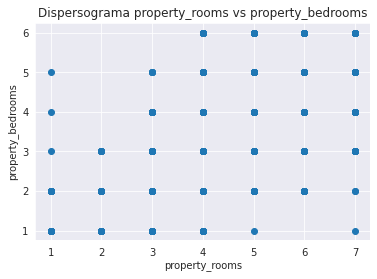

In [183]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

Parecerían exisitir algunas observaciones anómalas. Vamos a calcular la distancia de mahalanobis para cada observación.

In [184]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
349343             1.0                1.0     2.861838
85258              2.0                1.0     1.196611
235356             1.0                1.0     2.861838
229126             3.0                2.0     0.041716
162042             3.0                2.0     0.041716

Tenemos que seleccionar un valor umbral para definir qué observaciones podrían ser anómalas según la distancia de mahalanobis.

<AxesSubplot:ylabel='mahalanobis'>

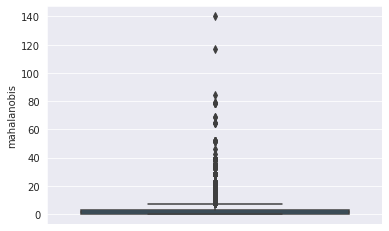

In [185]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

Seleccionamos 35 como valor umbral

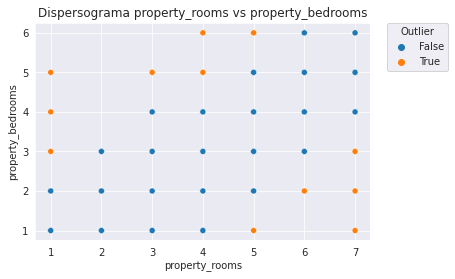

Los outliers para mahalanobis con un umbral de 35 son: 158. Constituyen el 0% de los datos


In [186]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot:ylabel='mahalanobis'>

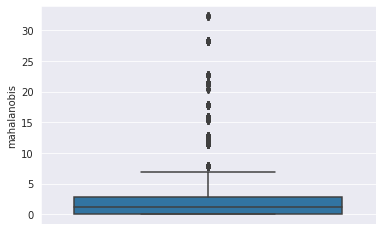

In [187]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [188]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
403143             6.0                2.0    39.146188
336275             4.0                5.0    38.535318
7827               7.0                3.0    35.042045
236626             5.0                6.0    51.456117
369301             7.0                3.0    35.042045
...                ...                ...          ...
213441             7.0                3.0    35.042045
97960              7.0                3.0    35.042045
324967             7.0                3.0    35.042045
440036             6.0                2.0    39.146188
239955             7.0                3.0    35.042045

[158 rows x 3 columns]

Como podemos observar en el scatter plot, quedan bien marcados los outliers que en nuestro dominio de problema no tienen ningun sentido.
Por ejemplo, tener 7 ambientes y 1 habitacion...
Procederemos a eliminar estos outliers.

###### Eliminamos dichas observaciones

In [189]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 158 registros en train
Se han eliminado: 30 registros en test


Dispersograma sin los outliers mencionados


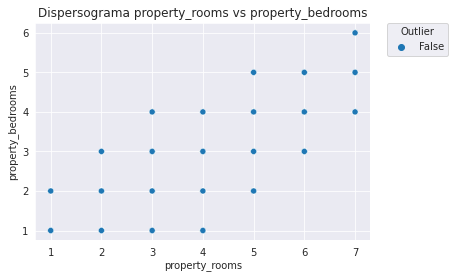

In [190]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

##### Analisis entre superficie total y superificie cubierta de valores atipicos

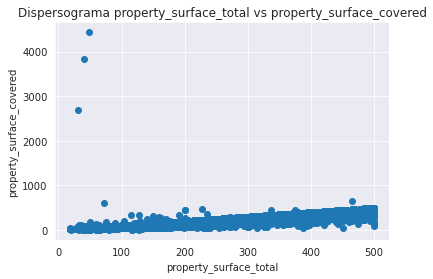

In [191]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [192]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
349343                    42.0                      32.0     0.619367
85258                     49.0                      45.0     0.310909
235356                    44.0                      38.0     0.437065
229126                    58.0                      54.0     0.181678
162042                    71.0                      65.0     0.063523

<AxesSubplot:ylabel='mahalanobis'>

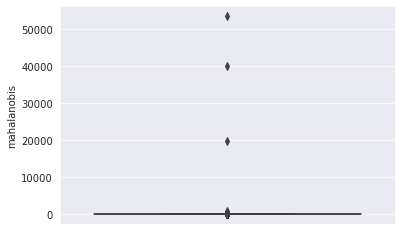

In [193]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [194]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [195]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered   mahalanobis
104592                   200.0                     450.0    231.013934
310407                   388.0                      38.0    226.597033
354376                    41.0                    3837.0  39978.839314
445383                   500.0                     130.0    238.662330
441196                    72.0                     602.0    804.099765
387598                   475.0                     140.0    192.608990
97055                    500.0                     130.0    238.662330
438160                    31.0                    2700.0  19739.725860
394706                   227.0                     466.0    224.674296
30359                     48.0                    4435.0  53426.976344
52468                    450.0                      45.0    303.471388
104359                   200.0                     450.0    231.013934
138208                   500.0                     100.0    285.608791
395321                   465.0                     650.0    251.414286
121279                   500.0                     130.0    238.662330

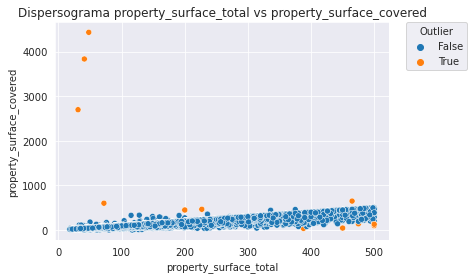

In [196]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

###### Como podemos observar, con mahalanobis pudimos detectar dos escenarios de outliers. Son outliers aquellas viviendas que tengan una superificie cubierta > superificie total Y son outliers tambien aquellas viviendas que tengan una brecha importante entre la superificie total y la cubierta. Por ejemplo: $380 m^2$ de total VS $80 m^2$ de cubierta. Procederemos a eliminarlos.

In [197]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 15 registros en train
Se han eliminado: 5 registros en test


Dispersograma sin los outliers mencionados


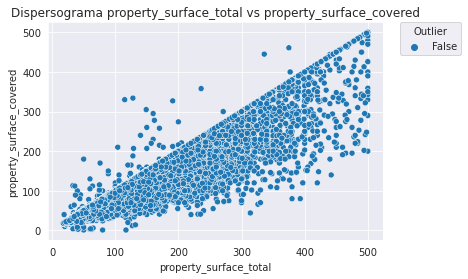

In [198]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

##### Analisis entre latitud y logitud de valores atipicos

In [199]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')


In [200]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 1.0024150858368475


latitud   longitud   mahalanobis
102563 -32.962151 -60.646585    167.949528
410404 -38.964493 -68.075830   7908.662489
9156   -31.390431 -64.179004    927.550230
32740  -31.678900 -63.879640    820.227520
308365 -34.694900 -58.469161      1.009556
...           ...        ...           ...
106297 -41.086352 -71.185720  15092.598921
234297 -31.302107 -64.254654    958.087857
10486  -41.163826 -71.438923  15602.945266
234899 -33.081689 -68.468828   3239.646881
43776  -29.413454 -66.856458   2100.788608

[99 rows x 3 columns]

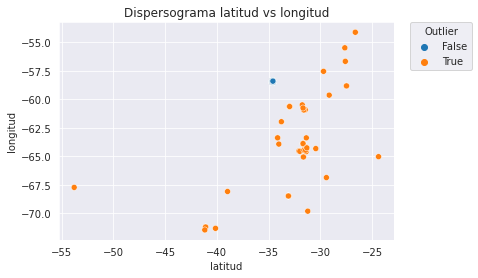

El grafico muestra 99 outliers
El mínimo según el umbral es de: 1.0024150858368475


In [201]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


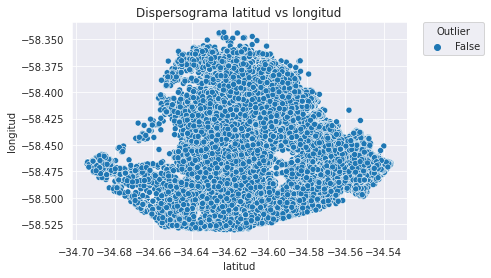

In [202]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'latitud', 'longitud',
                   umbral)

A simple vista se nota como el dispersograma cambió mucho y ahora se parece un poco a CABA. Notar además que tomamos como umbral 1 y sin embargo el valor mínimo de la distancia de estos outliers era de 106.

Como estos 1684 outliers tienen valores demasiado alejados del dataset, procederemos a borrarlos

In [203]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 99 registros en train
Se han eliminado: 5908 registros en test


Ahora que eliminamos los outliers de latitud y longitud, eliminaremos los datos nulos de place_l3.

In [204]:
ds_train.place_l3.isna().sum()

45

In [205]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

#### Analisis entre superficie total y precio

In [206]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    73070.000000
mean         2.128292
std         54.887336
min          0.000014
25%          0.196109
50%          0.412161
75%          0.695293
max      14588.628545
Name: mahalanobis, dtype: float64

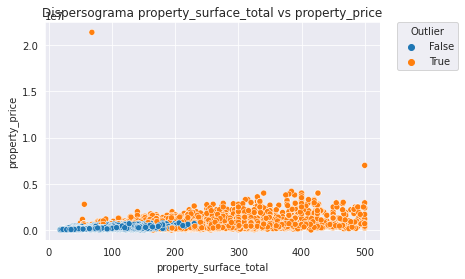

El grafico muestra 4849 outliers
El mínimo según el umbral es de: 5.000810067254474
Los outliers representan un 6.636102367592719%


In [207]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot:ylabel='mahalanobis'>

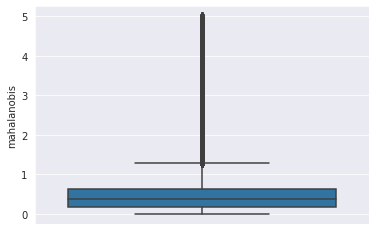

In [208]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

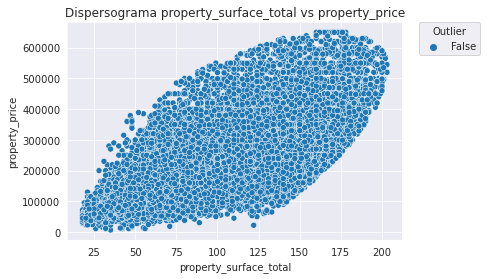

In [209]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

No llegamos a una buena conclusión para decidir el umbral por lo que tomaremos otro camino. Investigaremos acerca del precio por $m^2$ y realizaremos un análisis con el método de IQR sobre eso.

In [210]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 73070
outliers encontrados para los price_m2: 3338
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4283.783783783783, limite inf: 327.0270270270271


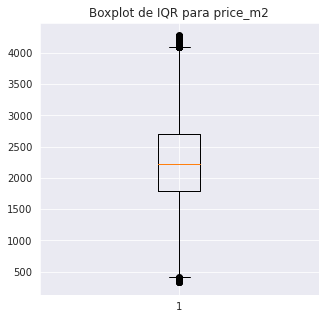

cantidad de datos del ds: 11804
outliers encontrados para los price_m2: 660
hay 5% de outliers de price_m2 sobre el ds
limit sup: 4188.683948155533, limite inf: 469.84047856430743


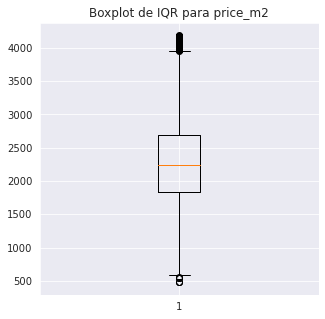

In [211]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3310 registros en train por encima del límite superior en train (4.529902832899959)
Hay 28 registros en train por debajo del límite inferior en train  (0.03831941973450116)
Hay 624 registros en train por encima del límite superior en train (0.8539756397974545)%
Hay 1 registros en train por debajo del límite inferior en train  (0.0013685507048036129%)


Text(0.5, 1.0, 'Distribución sin outliers')

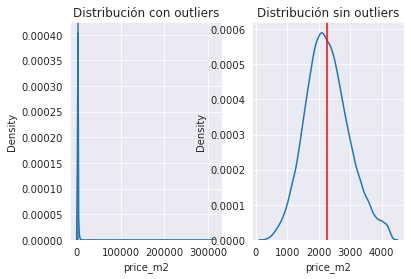

In [212]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

Como podemos ver, quitar estos outliers nos acerca el grafico a algo parecido a una distribución normal. Procederemos a borrar tanto los outliers superiores como inferiores.

In [213]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3310 registros en train
Se han eliminado: 624 registros en test


In [214]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 28 registros en train
Se han eliminado: 1 registros en test


#### LOF

In [215]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [216]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [217]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

##### Analisis de outliers para ambientes y habitaciones

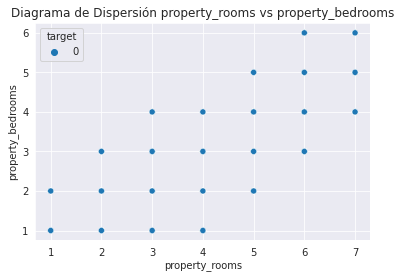

In [218]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [219]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id start_date                      end_date  \
349343  7lLQ98X5oaLxEgvqvmRsvQ== 2021-04-16 2021-06-05 00:00:00.000000000   
85258   5qGj3aJea4zq0LZZfxmy1w== 2021-03-26 2021-08-03 00:00:00.000000000   
235356  uUAhHTxU/NZrxmafq9ebiQ== 2021-06-02 2021-06-05 00:00:00.000000000   
229126  oPATJOhauH8x0Z/U0xpTpg== 2021-03-08 2021-06-05 00:00:00.000000000   
6635    +cklGp90A1eD97E6ZrEs5Q== 2021-02-09 2021-04-24 12:24:15.554154583   
...                          ...        ...                           ...   
251240  u8BqWyJ/RVZpBwPYOfFMSg== 2021-08-23 2021-10-09 00:00:00.000000000   
189636  H0Oat7o+T2vNn0mqBSv6AQ== 2021-06-04 2021-06-05 00:00:00.000000000   
332564  E064jrEj7NdQTIhQMZErEQ== 2021-09-17 2022-01-27 00:00:00.000000000   
34435   Kstv5x95wcsnoA06D7xoeA== 2021-02-08 2021-05-25 00:00:00.000000000   
54355   iOOjfHKsSARhFHxI2AYHEw== 2021-10-17 2022-01-27 00:00:00.000000000   

          latitud   longitud   place_l3 property_type  property_rooms  \
349343 -34.578010 -58.433521    Palermo  Departamento             1.0   
85258  -34.651827 -58.526738    Liniers  Departamento             2.0   
235356 -34.616692 -58.443128  Caballito  Departamento             1.0   
229126 -34.630025 -58.480687   Floresta  Departamento             3.0   
6635   -34.646583 -58.484324   Floresta            PH             2.0   
...           ...        ...        ...           ...             ...   
251240 -34.620393 -58.439971  Caballito  Departamento             2.0   
189636 -34.598541 -58.423284    Almagro  Departamento             2.0   
332564 -34.607845 -58.395356   Congreso  Departamento             2.0   
34435  -34.594429 -58.399676   Recoleta  Departamento             4.0   
54355  -34.579886 -58.413530    Palermo  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
349343                1.0                    42.0                      32.0   
85258                 1.0                    49.0                      45.0   
235356                1.0                    44.0                      38.0   
229126                2.0                    58.0                      54.0   
6635                  1.0                    55.0                      35.0   
...                   ...                     ...                       ...   
251240                1.0                    54.0                      44.0   
189636                1.0                    40.0                      40.0   
332564                1.0                    35.0                      35.0   
34435                 3.0                   120.0                     108.0   
54355                 2.0                    77.0                      72.0   

        property_price                                     property_title  \
349343        119800.0                 Departamento Monoambiente- Palermo   
85258          99000.0                     VENTA - DEPARTAMENTO - LINIERS   
235356         93942.0  Departamento - Caballito - Venta - Monoambient...   
229126        139000.0  Exc.Departamento 3Amb. C. Comedor.Balcón Tza. ...   
6635           89600.0  Moreto 33 - D3 Impec 2 amb s/expensas PB c/gra...   
...                ...                                                ...   
251240        109500.0                           Departamento - Caballito   
189636         79000.0   Departamento 2 amb, muy luminoso, 40m2 - Almagro   
332564         55000.0                            Departamento - Congreso   
34435         255000.0             DPTO VENTA 4 AMB C/DEPENCIA - RECOLETA   
54355         230000.0                       Departamento - Palermo Chico   

        target  scores  
349343       0    -1.0  
85258        0    -1.0  
235356       0    -1.0  
229126       0    -1.0  
6635         0    -1.0  
...        ...     ...  
251240       0    -1.0  
189636       0    -1.0  
332564       0    -1.0  
34435        0    -1.0  
54355        0    -1.0  

[69732 rows x 15 columns]

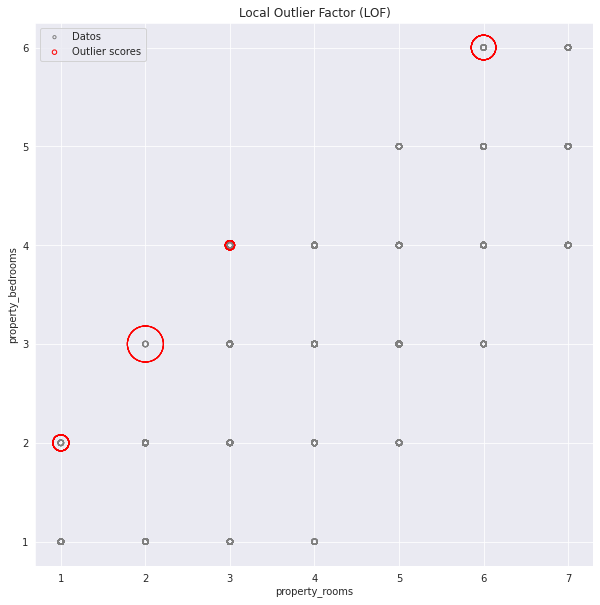

In [220]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

Como podemos observar, LOF parece estar marcandonos 3 outliers. Pareceria estar cumpliendo que un ambiente no puede ser mayor o igual al numero de habitaciones. No vimos un patro grande en el dataset que se rija bajo este criterio asi que en prinicpio no vamos a tomar accion al respecto. Lo grueso fue eliminado con mahalanobis.

##### Analisis de outliers para superficie total y superficie cubierta

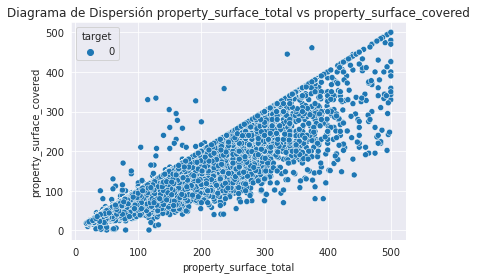

In [221]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [222]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id start_date                      end_date  \
349343  7lLQ98X5oaLxEgvqvmRsvQ== 2021-04-16 2021-06-05 00:00:00.000000000   
85258   5qGj3aJea4zq0LZZfxmy1w== 2021-03-26 2021-08-03 00:00:00.000000000   
235356  uUAhHTxU/NZrxmafq9ebiQ== 2021-06-02 2021-06-05 00:00:00.000000000   
229126  oPATJOhauH8x0Z/U0xpTpg== 2021-03-08 2021-06-05 00:00:00.000000000   
6635    +cklGp90A1eD97E6ZrEs5Q== 2021-02-09 2021-04-24 12:24:15.554154583   
...                          ...        ...                           ...   
251240  u8BqWyJ/RVZpBwPYOfFMSg== 2021-08-23 2021-10-09 00:00:00.000000000   
189636  H0Oat7o+T2vNn0mqBSv6AQ== 2021-06-04 2021-06-05 00:00:00.000000000   
332564  E064jrEj7NdQTIhQMZErEQ== 2021-09-17 2022-01-27 00:00:00.000000000   
34435   Kstv5x95wcsnoA06D7xoeA== 2021-02-08 2021-05-25 00:00:00.000000000   
54355   iOOjfHKsSARhFHxI2AYHEw== 2021-10-17 2022-01-27 00:00:00.000000000   

          latitud   longitud   place_l3 property_type  property_rooms  \
349343 -34.578010 -58.433521    Palermo  Departamento             1.0   
85258  -34.651827 -58.526738    Liniers  Departamento             2.0   
235356 -34.616692 -58.443128  Caballito  Departamento             1.0   
229126 -34.630025 -58.480687   Floresta  Departamento             3.0   
6635   -34.646583 -58.484324   Floresta            PH             2.0   
...           ...        ...        ...           ...             ...   
251240 -34.620393 -58.439971  Caballito  Departamento             2.0   
189636 -34.598541 -58.423284    Almagro  Departamento             2.0   
332564 -34.607845 -58.395356   Congreso  Departamento             2.0   
34435  -34.594429 -58.399676   Recoleta  Departamento             4.0   
54355  -34.579886 -58.413530    Palermo  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
349343                1.0                    42.0                      32.0   
85258                 1.0                    49.0                      45.0   
235356                1.0                    44.0                      38.0   
229126                2.0                    58.0                      54.0   
6635                  1.0                    55.0                      35.0   
...                   ...                     ...                       ...   
251240                1.0                    54.0                      44.0   
189636                1.0                    40.0                      40.0   
332564                1.0                    35.0                      35.0   
34435                 3.0                   120.0                     108.0   
54355                 2.0                    77.0                      72.0   

        property_price                                     property_title  \
349343        119800.0                 Departamento Monoambiente- Palermo   
85258          99000.0                     VENTA - DEPARTAMENTO - LINIERS   
235356         93942.0  Departamento - Caballito - Venta - Monoambient...   
229126        139000.0  Exc.Departamento 3Amb. C. Comedor.Balcón Tza. ...   
6635           89600.0  Moreto 33 - D3 Impec 2 amb s/expensas PB c/gra...   
...                ...                                                ...   
251240        109500.0                           Departamento - Caballito   
189636         79000.0   Departamento 2 amb, muy luminoso, 40m2 - Almagro   
332564         55000.0                            Departamento - Congreso   
34435         255000.0             DPTO VENTA 4 AMB C/DEPENCIA - RECOLETA   
54355         230000.0                       Departamento - Palermo Chico   

        target    scores  
349343       0 -1.000000  
85258        0 -1.000000  
235356       0 -1.000000  
229126       0 -1.000000  
6635         0 -0.980431  
...        ...       ...  
251240       0 -1.000000  
189636       0 -1.000000  
332564       0 -1.000000  
34435        0 -0.984074  
54355        0 -1.000000  

[69732 rows x 15 columns]

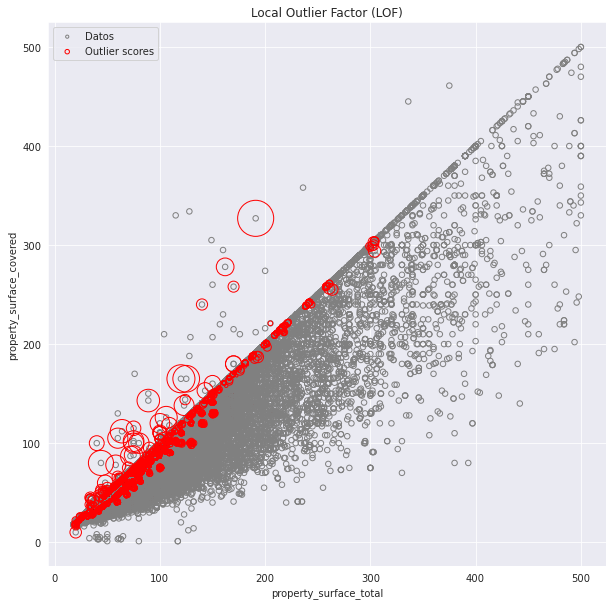

In [223]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

Como vemos en el grafico de LOF pareceria que la superifice total no puede ser exactamente igual a la superificie cubierta, por eso la deteccion de outiers a lo largo de la recta con pendiente creciente. Como no tenemos especificaciones tecnicas de cuantos metros menos deberia tener una superificie cubierta con respecto a la total, no vamos a tocar los datos.

#### Isolation Forest

##### Analisis de outliers para ambientes y habitaciones

In [224]:
rooms_bedrooms_iforest = ds_train[['property_rooms', 'property_bedrooms']]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_rooms'].isna())]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_bedrooms'].isna())]

iforest = IsolationForest(n_estimators=100, max_samples='auto',
                          contamination=0.05, max_features=2,
                          bootstrap=False, n_jobs=-1, random_state=1)

pred = iforest.fit_predict(rooms_bedrooms_iforest)
#Almaceno scores y etiquetas
rooms_bedrooms_iforest['scores'] = iforest.decision_function(rooms_bedrooms_iforest)
rooms_bedrooms_iforest['outlier_label'] = pred

#Observaciones anómalas
rooms_bedrooms_iforest[rooms_bedrooms_iforest.outlier_label == -1]

property_rooms  property_bedrooms    scores  outlier_label
281819             4.0                2.0 -0.044316             -1
236518             5.0                2.0 -0.067898             -1
252564             4.0                2.0 -0.044316             -1
256991             7.0                4.0 -0.122571             -1
18680              6.0                4.0 -0.054875             -1
...                ...                ...       ...            ...
422281             6.0                3.0 -0.073733             -1
439349             7.0                6.0 -0.189613             -1
327143             7.0                4.0 -0.122571             -1
42257              4.0                2.0 -0.044316             -1
313751             6.0                4.0 -0.054875             -1

[3284 rows x 4 columns]

In [225]:
rooms_bedrooms_iforest.outlier_label.value_counts()

 1    66448
-1     3284
Name: outlier_label, dtype: int64

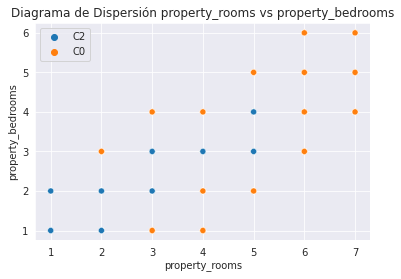

In [226]:
#Grafico dispersograma
color = [f"C{n + 1}" for n in (rooms_bedrooms_iforest['outlier_label'].values)]

sns.scatterplot(x=rooms_bedrooms_iforest['property_rooms'], y=rooms_bedrooms_iforest['property_bedrooms'], hue=color)
plt.title('Diagrama de Dispersión property_rooms vs property_bedrooms')
plt.show()

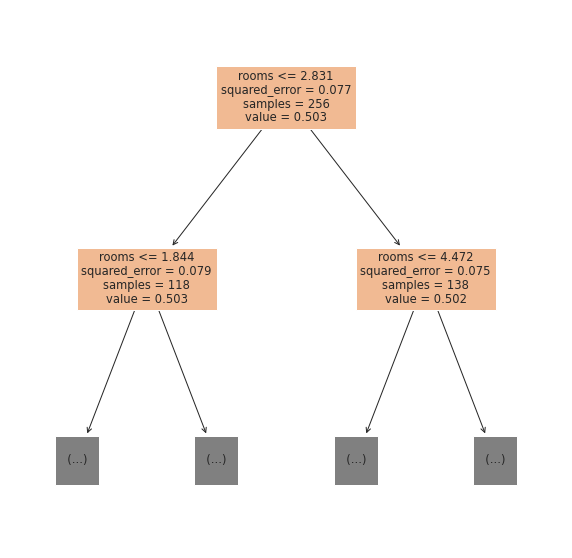

In [227]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['rooms', 'bedrooms'], filled=True, max_depth=1)
plt.show()

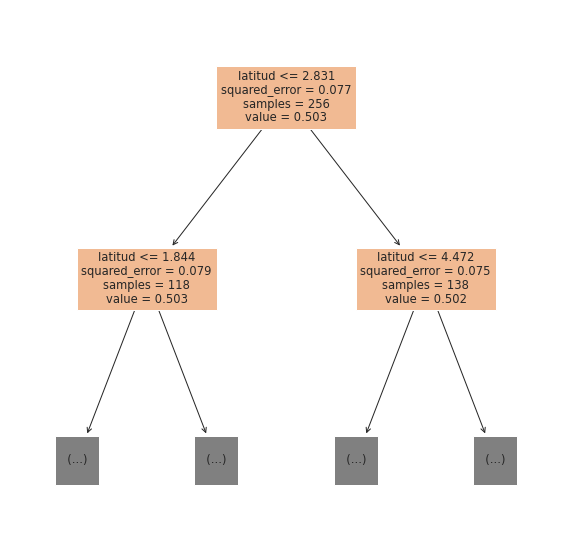

In [228]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['latitud', 'longitud'], filled=True, max_depth=1)
plt.show()

Habiendo hecho el análisis de valores atípicos y las imputaciones necesarias, finalmente eliminamos la columna id que usamos para hacer algunos merges.

In [229]:
# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

## Reduccion de la Dimensionalidad

### Analisis PCA

Para poder realizar el análisis PCA del dataset es necesario que todos los campos sean numéricos.
Vamos a deshacernos de las siguientes columnas:
- ID: no aporta información
- Fechas y título: no pueden adaptarse a un formato numérico
- place_l3: es información redundante cuando tenemos latitud y longitud.
- property_price: es la variable que queremos predecir


In [266]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
349343 -34.578010 -58.433521             1.0                1.0   
85258  -34.651827 -58.526738             2.0                1.0   
235356 -34.616692 -58.443128             1.0                1.0   
229126 -34.630025 -58.480687             3.0                2.0   
6635   -34.646583 -58.484324             2.0                1.0   
...           ...        ...             ...                ...   
251240 -34.620393 -58.439971             2.0                1.0   
189636 -34.598541 -58.423284             2.0                1.0   
332564 -34.607845 -58.395356             2.0                1.0   
34435  -34.594429 -58.399676             4.0                3.0   
54355  -34.579886 -58.413530             3.0                2.0   

        property_surface_total  property_surface_covered  
349343                    42.0                      32.0  
85258                     49.0                      45.0  
235356                    44.0                      38.0  
229126                    58.0                      54.0  
6635                      55.0                      35.0  
...                        ...                       ...  
251240                    54.0                      44.0  
189636                    40.0                      40.0  
332564                    35.0                      35.0  
34435                    120.0                     108.0  
54355                     77.0                      72.0  

[69732 rows x 6 columns]

In [267]:
ds_reducido.shape

(69732, 6)

Procedemos ahora a normalizar las columnas del dataframe

In [268]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0      0.692906  0.175602       -1.395964          -0.888586   
1     -2.104738 -2.326417       -0.585391          -0.888586   
2     -0.773129 -0.082254       -1.395964          -0.888586   
3     -1.278469 -1.090376        0.225182           0.173313   
4     -1.905997 -1.187983       -0.585391          -0.888586   
...         ...       ...             ...                ...   
69727 -0.913418  0.002496       -0.585391          -0.888586   
69728 -0.085227  0.450370       -0.585391          -0.888586   
69729 -0.437854  1.199991       -0.585391          -0.888586   
69730  0.070615  1.084041        1.035756           1.235212   
69731  0.621768  0.712191        0.225182           0.173313   

       property_surface_total  property_surface_covered  
0                   -0.657371                 -0.774409  
1                   -0.543558                 -0.517716  
2                   -0.624853                 -0.655935  
3                   -0.397227                 -0.340005  
4                   -0.446004                 -0.715172  
...                       ...                       ...  
69727               -0.462263                 -0.537462  
69728               -0.689890                 -0.616444  
69729               -0.771185                 -0.715172  
69730                0.610835                  0.726259  
69731               -0.088304                  0.015416  

[69732 rows x 6 columns]

Armamos ahora la matriz de correlación del dataset normalizado

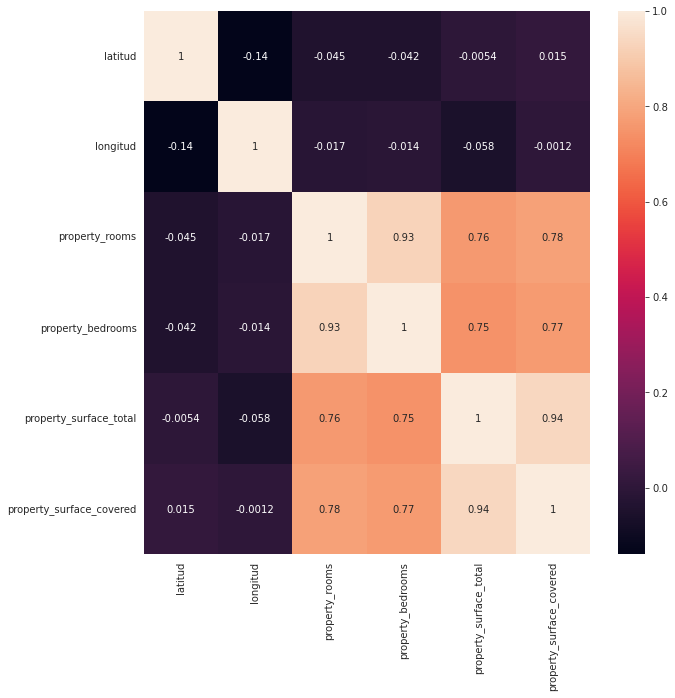

In [269]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

Como era de esperarse, podemos ver que existe una correlación muy fuerte entre property_surface_total y property_surface_covered y entre property_rooms y property_bedrooms

Ahora si comenzamos con PCA y calculamos las componentes principales, elegimos el mismo número de variables que en el dataframe anterior

In [270]:
ds_reducido_normalizado.shape

(69732, 6)

In [271]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0     -1.871515 -0.397622 -0.587487  0.370099  0.363470  0.078778
1     -1.194311 -0.161545  3.143232  0.358617 -0.198538 -0.193604
2     -1.769642  0.455524  0.615237  0.553365  0.372242 -0.032555
3     -0.132207  0.172261  1.700754 -0.475562 -0.047818 -0.096827
4     -1.268224  0.497847  2.210384  0.312777 -0.203670  0.073684
...         ...       ...       ...       ...       ...       ...
69727 -1.222293  0.630503  0.657708  0.319400 -0.207046  0.012591
69728 -1.395416  0.370031 -0.234475  0.101919 -0.216304 -0.045289
69729 -1.493695  1.152018 -0.511327  0.046507 -0.219680 -0.003539
69730  1.782380  0.745937 -0.838953 -0.474802  0.129061  0.001818
69731  0.141071  0.076613 -0.936056 -0.279619 -0.047400 -0.013673

[69732 rows x 6 columns]

In [272]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.19
0.14
0.07
0.01
0.01


In [273]:
varianza_explicada.cumsum()

array([0.57734935, 0.76784178, 0.91146501, 0.97880848, 0.99069786,
       1.        ])

Podemos ver que con 3 componentes llegamos a un 91% de la varianza, trataremos de ver esto en un gráfico

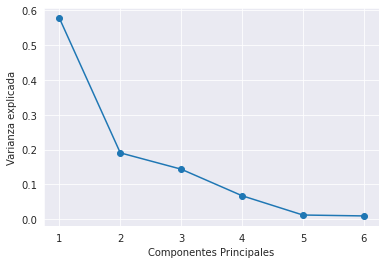

In [238]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

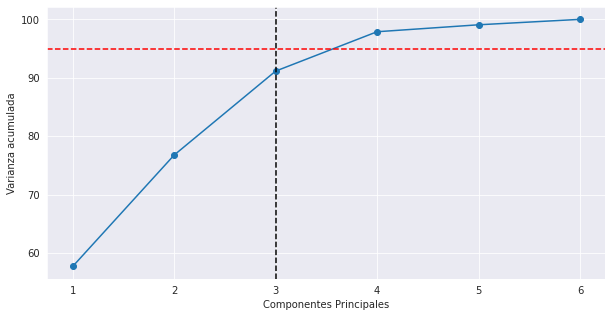

In [239]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

Con 3 componentes logramos explicar más del 90% de la varianza, por lo que nos quedaremos con esta reducción.

In [274]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0 -1.871515 -0.397622 -0.587487
1 -1.194311 -0.161545  3.143232
2 -1.769642  0.455524  0.615237
3 -0.132207  0.172261  1.700754
4 -1.268224  0.497847  2.210384

## Agrupamiento

Importamos librerías de agrupamiento.

In [302]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from pyclustertend import hopkins

Para el analisis de agrupamiento incorporaremos el precio

In [275]:
ds_agrupamiento = ds_reducido.copy()
ds_agrupamiento['property_price'] = ds_train.property_price
ds_agrupamiento

latitud   longitud  property_rooms  property_bedrooms  \
349343 -34.578010 -58.433521             1.0                1.0   
85258  -34.651827 -58.526738             2.0                1.0   
235356 -34.616692 -58.443128             1.0                1.0   
229126 -34.630025 -58.480687             3.0                2.0   
6635   -34.646583 -58.484324             2.0                1.0   
...           ...        ...             ...                ...   
251240 -34.620393 -58.439971             2.0                1.0   
189636 -34.598541 -58.423284             2.0                1.0   
332564 -34.607845 -58.395356             2.0                1.0   
34435  -34.594429 -58.399676             4.0                3.0   
54355  -34.579886 -58.413530             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  
349343                    42.0                      32.0        119800.0  
85258                     49.0                      45.0         99000.0  
235356                    44.0                      38.0         93942.0  
229126                    58.0                      54.0        139000.0  
6635                      55.0                      35.0         89600.0  
...                        ...                       ...             ...  
251240                    54.0                      44.0        109500.0  
189636                    40.0                      40.0         79000.0  
332564                    35.0                      35.0         55000.0  
34435                    120.0                     108.0        255000.0  
54355                     77.0                      72.0        230000.0  

[69732 rows x 7 columns]

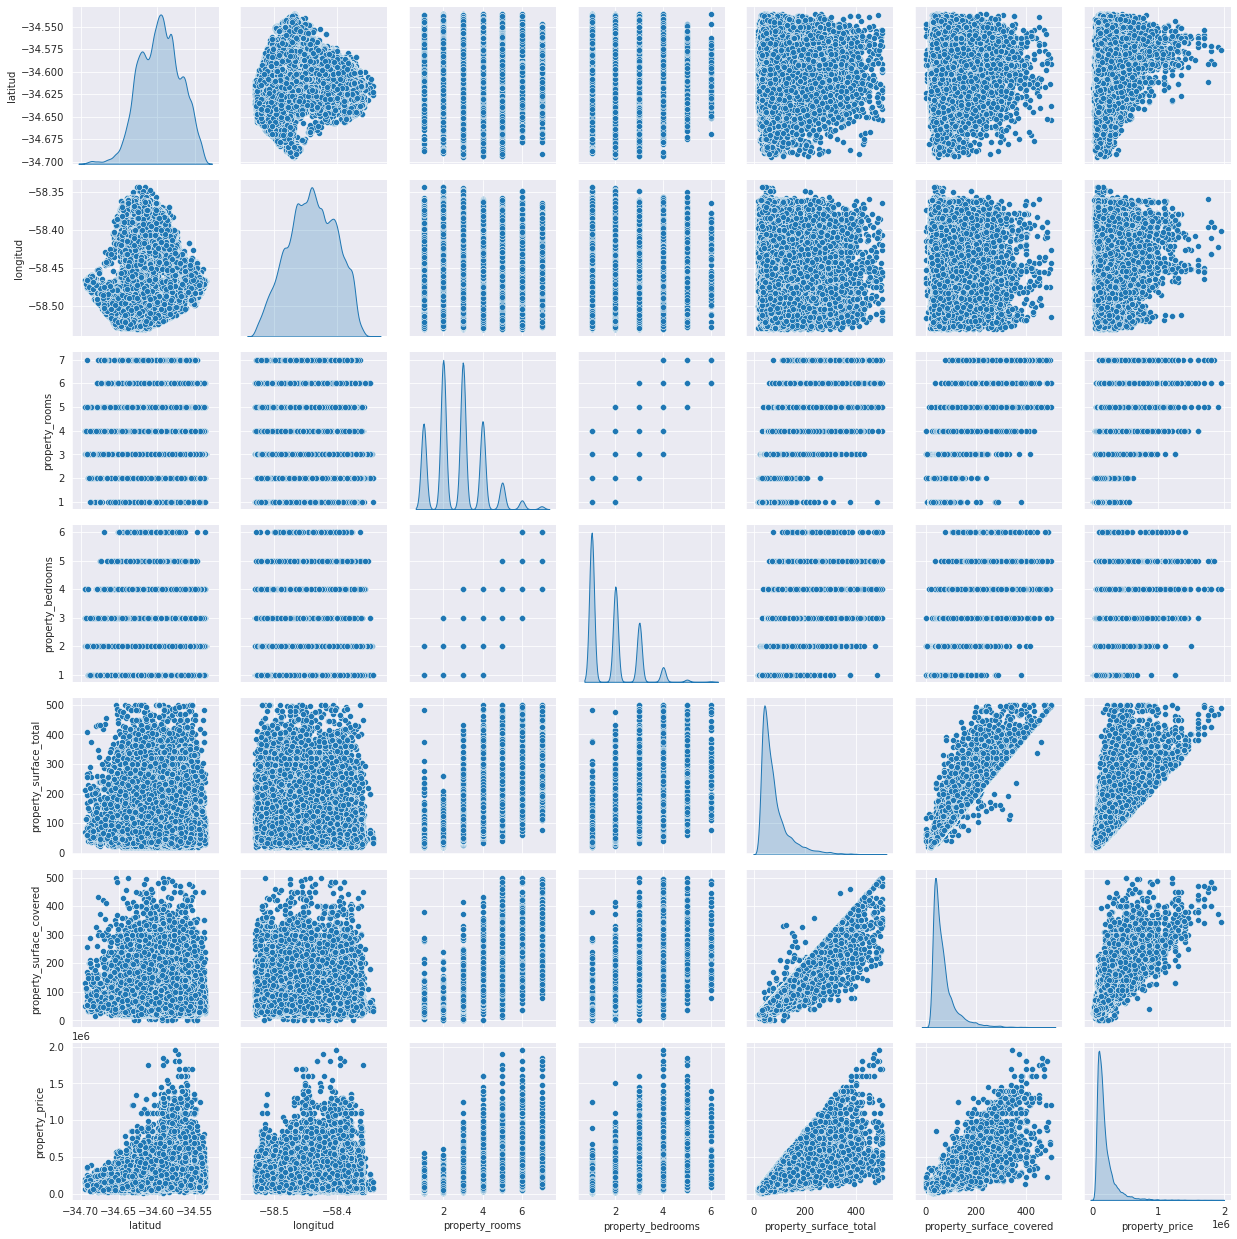

In [276]:
sns.pairplot(ds_agrupamiento, diag_kind='kde');

In [277]:
hopkins(ds_agrupamiento, ds_agrupamiento.shape[0])

0.0020914842512638992

Para la estadística de Hopkins, un valor cercano a cero indica que la distribución es bastante uniforme y que hay poca tendencia al clustering.

Si bien es dificil identificar agrupamientos en estos gráficos, probaremos buscarlos mediante el uso de KMeans

#### Método de Elbow

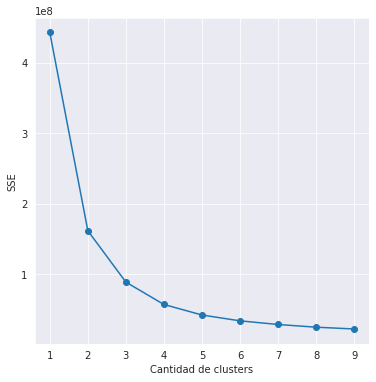

In [282]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_reducido)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Podemos ver que para 2 o 3 clusters la pendiente cambia de forma bastante significativa. Probaremos predicciones con KMeans para esas cantidades.

#### KMeans

In [294]:
kmeans = KMeans(2, random_state=0)
kmeans.fit(ds_reducido)

y_2_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters')

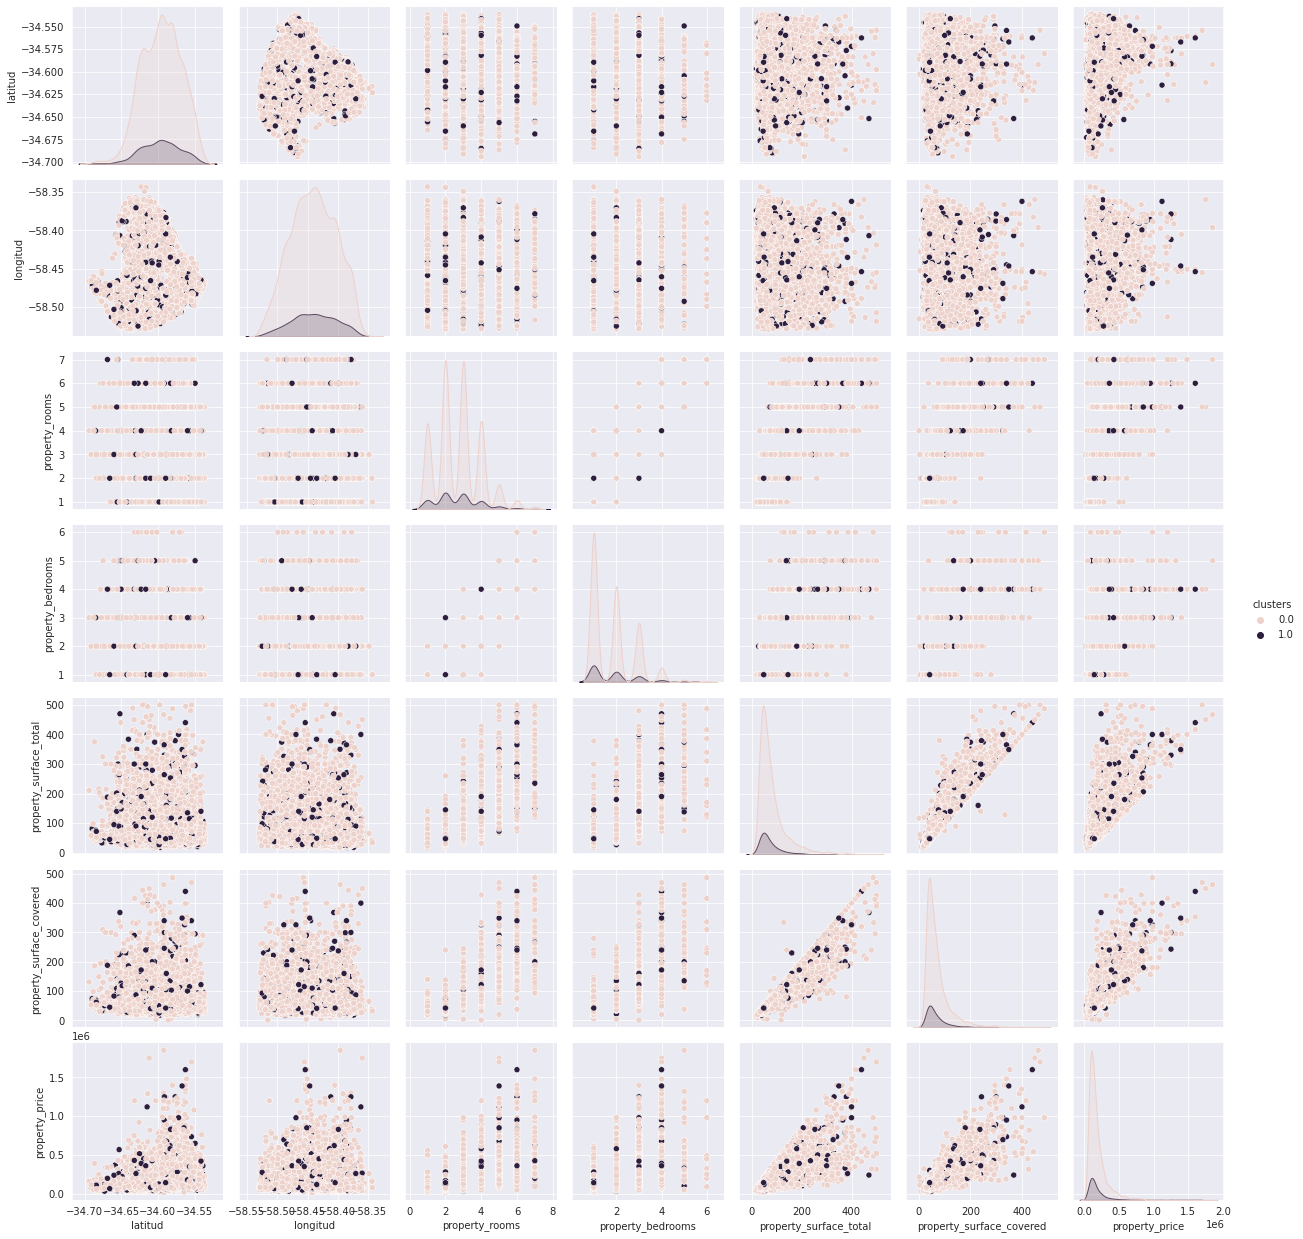

In [289]:
sns.pairplot(pd.concat([ds_agrupamiento, y_2_clusters], axis=1), hue='clusters');

In [295]:
kmeans = KMeans(3, random_state=0)
kmeans.fit(ds_reducido)

y_3_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters')

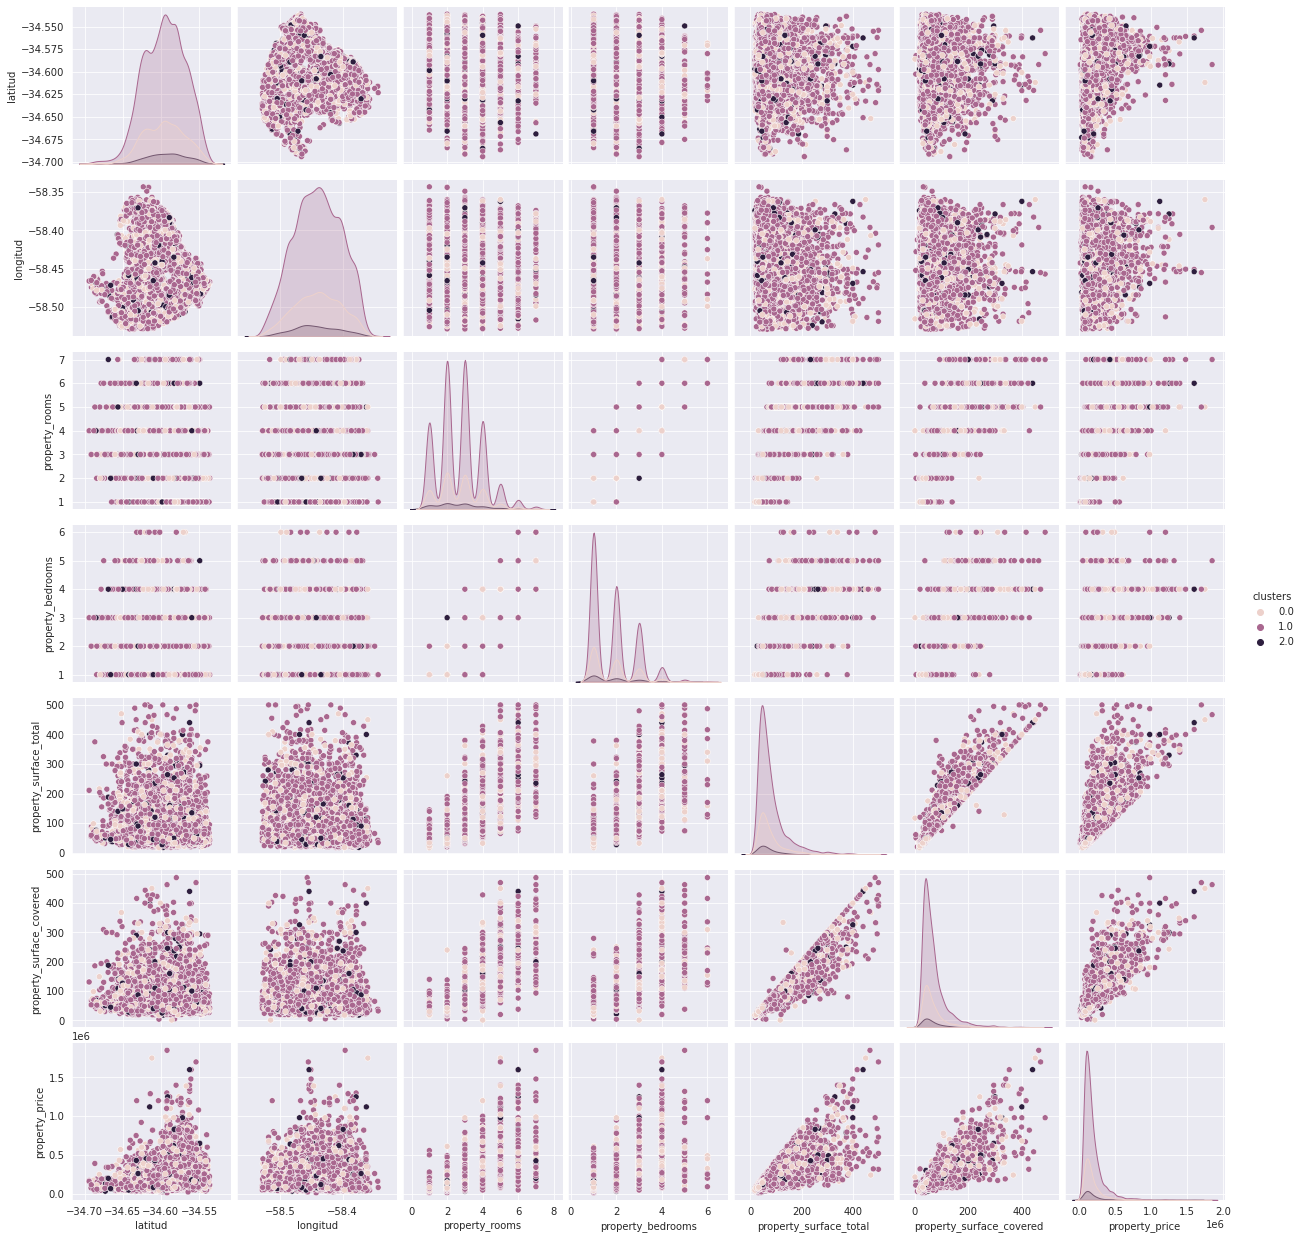

In [290]:
sns.pairplot(pd.concat([ds_agrupamiento, y_3_clusters], axis=1), hue='clusters');

### Analisis de Silhouette

Realizaremos un analisis de Silhouette para evaluar la calidad de los clusters.

In [292]:
list_k = list(range(2, 6))
sse = []

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_agrupamiento)
    score = silhouette_score(ds_agrupamiento, preds)
    print(f"Para {n_clusters} el puntaje de Silhouette es " + str(score))

Para 2 el puntaje de Silhouette es 0.7183820882749982
Para 3 el puntaje de Silhouette es 0.6220069960343745
Para 4 el puntaje de Silhouette es 0.5624599026801043
Para 5 el puntaje de Silhouette es 0.5346875356944514


El mejor puntaje es el de 2 clusters. Cuanto más cerca de 1 mayor tendencia a agruparse. Evaluaremos la calidad de los clusters mediante el gráfico de silueta

#### Para 2 clusters

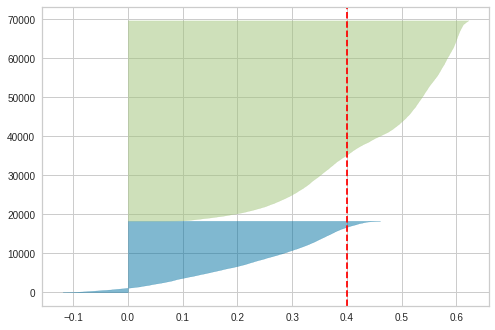

In [293]:
model = KMeans(2, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(ds_agrupamiento)
plt.show()

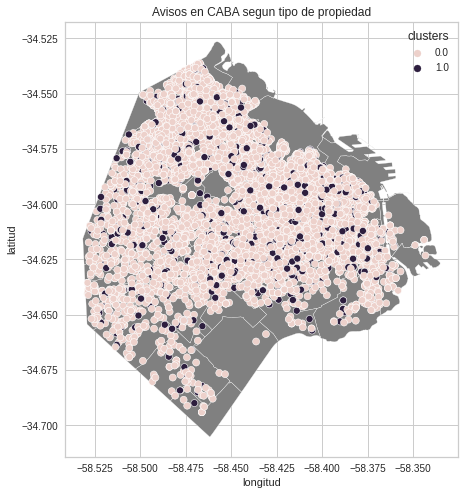

In [300]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_2_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()

#### Para 3 clusters

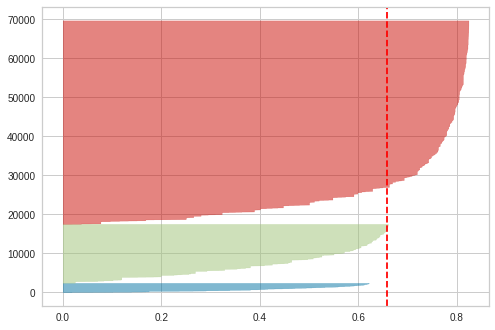

In [301]:
model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')  # Instancio el visualizador
visualizer.fit(ds_agrupamiento)
plt.show()

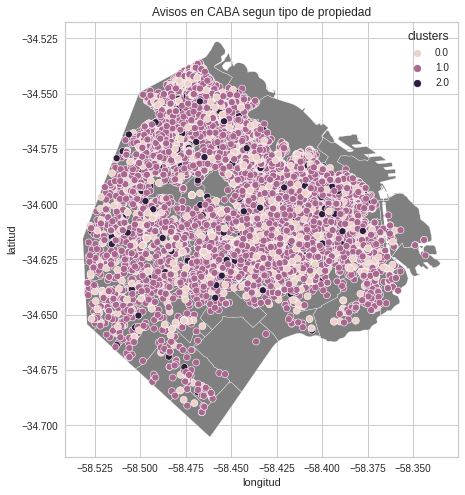

In [303]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_3_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()